___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [610]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from ipywidgets import interact

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    make_scorer,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    average_precision_score,
    roc_curve,
    auc,
)
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from pywaffle.waffle import Waffle
import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 1000)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [611]:
df_male = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr',encoding='latin-1')
df_female= pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq')

## Explore Data

In [612]:
df_male.head(3)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand


In [613]:
df_female.head(3)

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand


In [614]:
df_male.shape

(4082, 108)

In [615]:
df_female.shape

(1986, 108)

In [616]:
df_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB


In [617]:
df_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Columns: 108 entries, SubjectId to WritingPreference
dtypes: int64(99), object(9)
memory usage: 1.6+ MB


In [618]:
df_male.describe()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
count,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000
mean,20003.370897,254.650906,1440.736894,335.244488,229.343949,1329.082068,252.017148,200.935081,415.675649,358.135718,275.433366,510.424792,74.784909,331.651396,315.713376,142.622244,1019.518863,245.849339,887.866732,617.953454,502.924792,392.260657,1517.299608,289.441450,1058.705537,253.847134,1291.118569,845.929936,622.343704,355.917442,36.062469,64.214601,23.174179,245.041646,804.513229,101.859138,271.178344,349.010289,310.058550,579.928466,480.213866,1130.153111,88.261391,212.283684,193.277805,154.330230,574.372856,199.504655,343.473297,72.505634,345.733219,379.297403,1061.629348,640.155561,430.853503,450.163155,488.388045,554.155561,491.658011,72.904459,409.287849,122.644292,397.648947,434.596031,1426.678589,116.455904,429.803528,267.882656,1178.587457,363.709946,149.776090,918.289809,895.847134,593.124449,1814.154336,1756.214601,1438.592112,1120.668545,625.142332,180.460314,811.925282,468.207006,131.146987,900.930671,1664.804263,477.612445,326.437286,940.577413,237.771436,387.642822,1056.485301,855.239588,175.916707,847.511514,8.973542,1.534052,30.158991,70.035767,188.00

In [619]:
df_female.describe()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
count,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.00000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.00000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.00000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.00000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000
mean,22306.606244,229.651057,1335.095166,311.198389,215.739678,1239.029708,228.110272,182.05136,365.348943,305.578550,273.299597,450.324270,67.047835,311.012588,287.978852,133.765358,1021.247734,232.926989,833.742195,590.594663,485.120342,373.257805,1395.667170,269.329809,946.858006,247.40433,1171.636455,782.317221,620.840383,341.858006,33.220040,59.360524,20.391239,232.421954,747.686808,92.711984,246.293051,317.711984,264.081571,494.828298,439.862034,1044.284995,78.154079,186.550352,181.083082,147.768882,561.119839,189.819738,310.321249,67.162638,353.836858,398.961732,995.725076,617.076536,373.364048,395.708963,449.049345,511.286506,465.936556,62.748238,400.708459,113.094663,329.795569,371.162135,1309.736153,108.697382,388.199899,241.330312,1028.185297,334.297583,135.405337,856.625881,806.685297,543.552367,1660.286506,1628.473313,1329.688822,1056.256798,616.148540,167.86002,744.005035,437.767875,126.475327,845.350957,1559.409366,425.40282,299.894260,860.905337,213.030715,355.136455,980.149043,677.582075,154.792548,794.190332,35.072004,1.781470,28.943605,64.601712,147.505035
std,20

In [620]:
df_male.isnull().sum().any()

True

In [621]:
df_female.isnull().sum().any()

True

In [622]:
df_male.columns.difference(df_female.columns)  

Index(['subjectid'], dtype='object')

In [623]:
df_female.columns.difference(df_male.columns) 

Index(['SubjectId'], dtype='object')

In [624]:
df_female.rename(columns={"SubjectId": "subjectid"}, inplace=True)

In [625]:
df_female.columns.difference(df_male.columns) 

Index([], dtype='object')

In [626]:
df_male.columns.equals(df_female.columns)

True

In [627]:
new_df = pd.concat([df_female,df_male], axis=0, ignore_index=True)

In [628]:
new_df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [629]:
new_df.tail()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
6063,29442,235,1353,312,216,1263,228,193,384,318,241,457,70,321,301,137,917,231,878,587,497,345,1444,266,954,238,1231,807,606,306,36,61,22,195,762,95,255,329,277,533,460,1073,81,193,182,151,554,187,323,69,301,353,1025,595,405,422,474,523,476,68,371,123,378,427,1304,112,418,259,1096,348,150,883,865,568,1688,1688,1368,1079,579,162,758,447,140,869,1557,442,279,816,210,347,1016,675,163,778,Male,4-Apr-12,Camp Shelby,Army National Guard,Combat Arms,11B,Colorado,51,Blackfoot Cherokee Choctaw,1,22,67,160,Right hand
6064,29443,247,1473,336,234,1346,253,196,428,374,284,536,76,319,316,135,1049,252,899,632,517,399,1533,323,1072,242,1301,848,695,378,35,60,20,299,807,103,263,341,327,600,476,1088,94,222,191,149,558,196,327,67,356,395,1057,590,468,473,491,565,510,67,420,117,392,430,1433,114,447,265,1199,356,146,938,903,606,1818,1765,1456,1146,662,171,785,472,135,886,1715,475,351,978,235,385,1082,896,178,873,Male,4-Apr-12,Camp Shelby,Army National Guard,Combat Arms,91B,Oklahoma,1,NaN,1,22,71,194,Right hand
6065,29447,264,1394,313,227,1280,245,193,407,367,271,501,74,323,316,142,1038,276,857,614,502,378,1469,290,1045,247,1263,787,668,337,38,62,26,257,784,101,263,340,312,540,455,1045,83,207,183,148,555,194,340,74,334,362,1032,560,434,450,464,527,466,71,413,118,416,444,1310,110,407,257,1181,333,135,895,860,571,1642,1690,1384,1096,605,178,750,439,127,858,1682,483,333,991,258,353,1011,832,178,822,Male,4-Apr-12,Camp Shelby,Army National Guard,Combat Arms,13B,Oklahoma,1,NaN,1,23,67,186,Right hand
6066,29451,203,1417,327,223,1314,250,196,419,365,271,493,75,342,327,138,929,209,898,598,499,389,1483,284,984,228,1271,846,603,314,37,61,22,237,782,98,266,322,299,552,461,1091,92,218,192,150,560,197,326,65,320,352,1050,630,440,445,480,542,489,70,364,123,387,414,1388,115,432,254,1162,358,154,900,874,576,1760,1718,1405,1116,544,170,779,453,118,886,1589,430,293,783,192,350,1062,731,172,837,Male,4-Apr-12,Camp Shelby,Army National Guard,Combat Arms,13P,Oklahoma,1,NaN,1,22,69,165,Right hand
6067,29452,327,1523,358,226,1408,269,225,442,379,275,531,81,359,364,150,1009,254,981,659,550,396,1595,308,1144,281,1349,931,637,313,36,61,24,214,780,111,295,377,317,601,519,1212,95,223,205,153,615,22

In [630]:
new_df.shape

(6068, 108)

In [631]:
new_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [632]:
new_df.isna().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [633]:
new_df.drop(columns=['Ethnicity'], inplace = True)

In [634]:
new_df.isna().sum().any()

False

In [635]:
new_df.duplicated().sum()

0

In [636]:
new_df["DODRace"].value_counts()

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

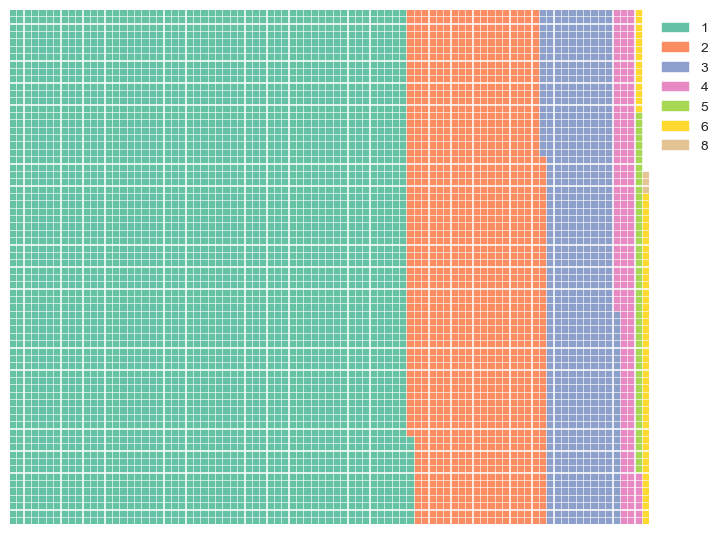

In [637]:
data_DODRace = {
    '1': 3792,
    '2': 1298,
    '3': 679,
    '4': 188,
    '5': 49,
    '6': 59,
    '8': 3
}

# Create a waffle chart
fig = plt.figure(
    FigureClass=Waffle, 
    rows=70,  # Number of rows in the waffle grid (adjust as needed)
    values=data_DODRace,  # Data to visualize
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)

plt.show()

In [638]:
# Get summary statistics for object columns, excluding int64 columns
object_columns = new_df.select_dtypes(include=['object'])
object_summary = object_columns.describe()

# Transpose the result
object_summary = object_summary.T

# Display the summary statistics for object columns
print(object_summary)

                      count unique                     top  freq
Gender                 6068      2                    Male  4082
Date                   6068    253               27-Feb-12    45
Installation           6068     12             Camp Shelby  1160
Component              6068      3            Regular Army  3140
Branch                 6068      3  Combat Service Support  3174
PrimaryMOS             6068    285                     11B   671
SubjectsBirthLocation  6068    152              California   446
WritingPreference      6068      3              Right hand  5350


In [639]:
#I will drop Columns[DAte, BrimaryMOS] becouse they are unnecessary and contain too many unique values
new_df.drop(columns=["Date","PrimaryMOS"], inplace=True)

In [640]:
new_df.shape

(6068, 105)

In [641]:
new_df['SubjectsBirthLocation'].value_counts()

SubjectsBirthLocation
California                  446
New York                    420
Texas                       397
Indiana                     266
Oklahoma                    221
Illinois                    216
Florida                     210
Minnesota                   200
Michigan                    196
Mississippi                 194
Georgia                     170
Alabama                     164
South Carolina              161
North Carolina              149
Ohio                        142
Louisiana                   137
Pennsylvania                132
Virginia                    118
Massachusetts               112
Wisconsin                   102
Germany                      92
New Jersey                   89
Puerto Rico                  88
Missouri                     84
Arizona                      84
Colorado                     81
Maryland                     80
Tennessee                    74
Kentucky                     69
Washington                   66
Kansas            

In [642]:
new_df['Installation'].value_counts()

Installation
Camp Shelby       1160
Fort Bliss         963
Fort Gordon        669
Fort McCoy         452
Camp Atterbury     441
Fort Hood          439
Fort Huachuca      436
Fort Bragg         397
Fort Drum          391
Fort Lee           380
Fort Stewart       339
Fort Rucker          1
Name: count, dtype: int64

In [643]:
new_df['Component'].value_counts()

Component
Regular Army           3140
Army National Guard    2708
Army Reserve            220
Name: count, dtype: int64

In [644]:
new_df.Component.value_counts(normalize=True)

Component
Regular Army           0.517469
Army National Guard    0.446276
Army Reserve           0.036256
Name: proportion, dtype: float64

In [645]:
new_df['Branch'].value_counts()

Branch
Combat Service Support    3174
Combat Arms               1582
Combat Support            1312
Name: count, dtype: int64

In [646]:
new_df.Branch.value_counts(normalize=True)

Branch
Combat Service Support    0.523072
Combat Arms               0.260712
Combat Support            0.216216
Name: proportion, dtype: float64

In [647]:
new_df["DODRace"] = new_df.DODRace.map(
    {
        1: "White",
        2: "Black",
        3: "Hispanic",
        4: "Asian",
        5: "Native American",
        6: "Pacific Islander",
        8: "Other",
    }
)


In [648]:
new_df.DODRace.value_counts(dropna=False)

DODRace
White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: count, dtype: int64

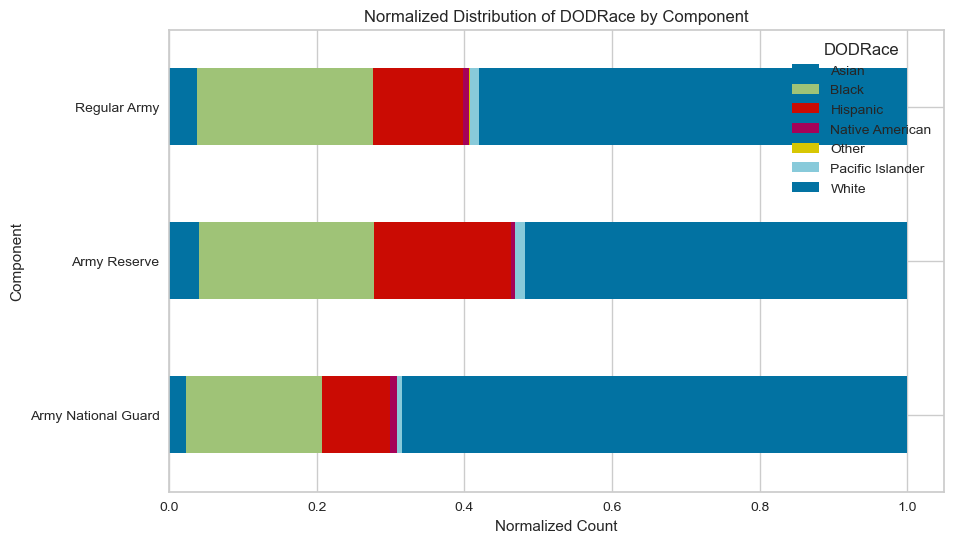

In [649]:

new_df.groupby("Component")["DODRace"].value_counts(normalize=True).unstack().plot(kind="barh", stacked=True, figsize=(10, 6))

plt.xlabel("Normalized Count")
plt.ylabel("Component")
plt.title("Normalized Distribution of DODRace by Component")
plt.legend(title="DODRace")
plt.show()

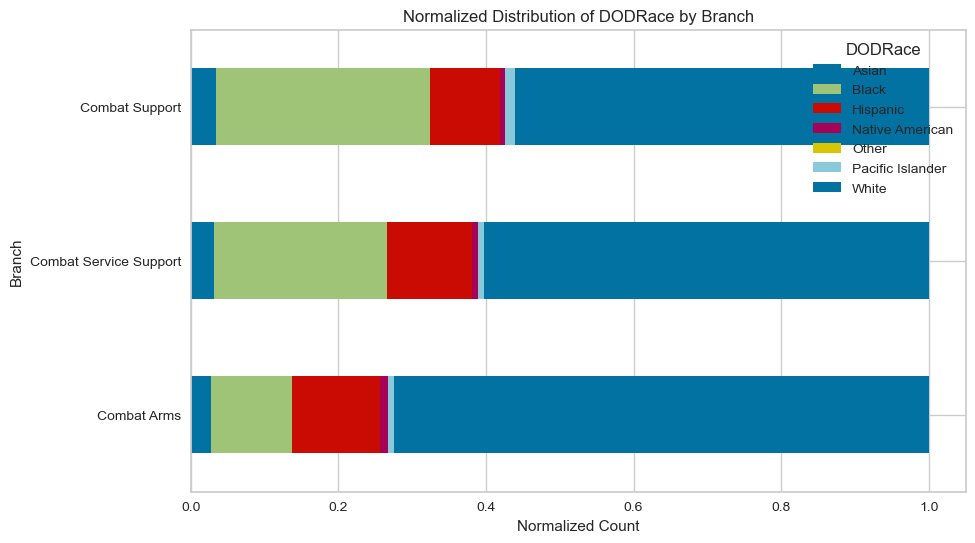

In [650]:
new_df.groupby("Branch")["DODRace"].value_counts(normalize=True).unstack().plot(kind="barh", stacked=True, figsize=(10, 6))

plt.xlabel("Normalized Count")
plt.ylabel("Branch")
plt.title("Normalized Distribution of DODRace by Branch")
plt.legend(title="DODRace")
plt.show()

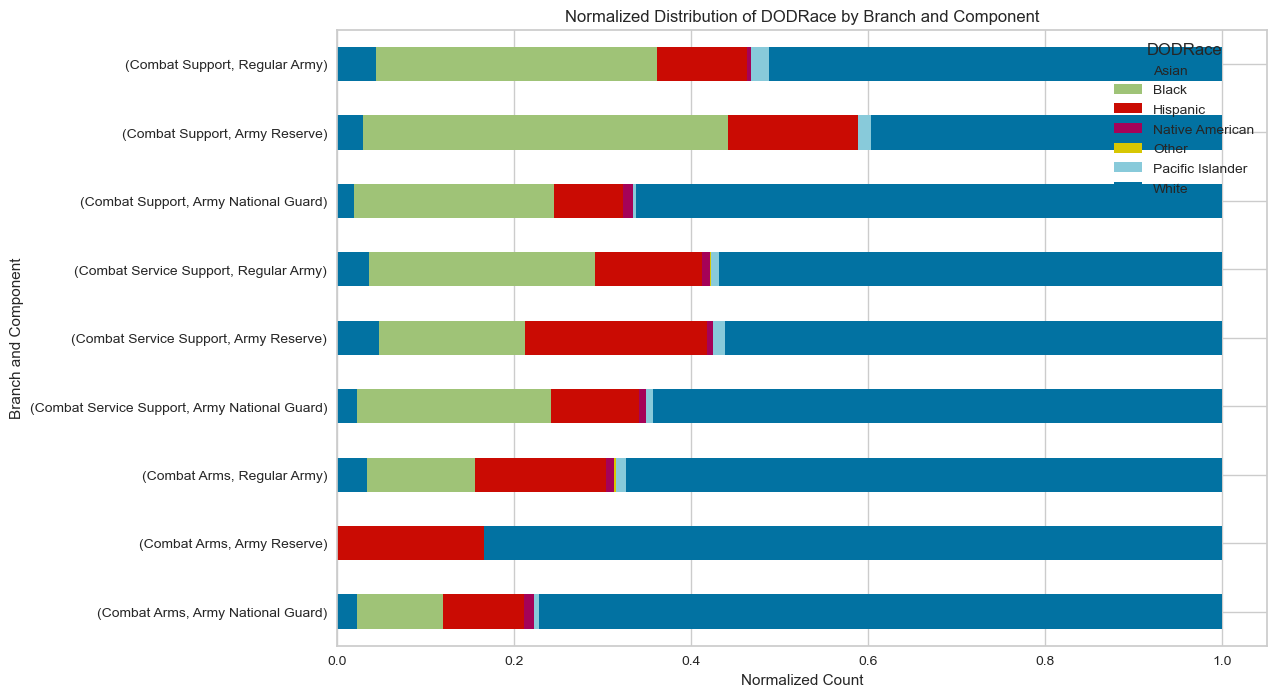

In [651]:

# Group the data by "Branch", "Component", and "DODRace", and calculate the normalized counts
normalized_counts = new_df.groupby(["Branch", "Component"])["DODRace"].value_counts(normalize=True).unstack()

normalized_counts.plot(kind="barh", stacked=True, figsize=(12, 8))

plt.xlabel("Normalized Count")
plt.ylabel("Branch and Component")
plt.title("Normalized Distribution of DODRace by Branch and Component")

plt.legend(title="DODRace")

plt.show()

In [652]:
new_df.drop(columns=["Age" ,"WritingPreference", "Weightlbs", "Branch", "Component", "Installation", "SubjectNumericRace", "Heightin"
], inplace=True)
new_df
#drop self-reported feachers and unnecessary column.

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,Germany,Black
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,California,Hispanic
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,Texas,White
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,District of Columbia,Black
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,Female,Texas,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [653]:
new_df.drop(columns=["subjectid"], inplace = True)

In [654]:
new_df.shape

(6068, 96)

In [655]:

new_df2 = new_df[(new_df["DODRace"] == "White") | (new_df["DODRace"] == "Black") |
                (new_df["DODRace"] == "Hispanic")]
new_df2
# selected only White, Black, Hispanic

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,Germany,Black
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,California,Hispanic
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,Texas,White
3,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,District of Columbia,Black
4,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,Female,Texas,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [656]:
new_df2.reset_index(drop=True, inplace=True)

In [657]:
for col in new_df2:
    print(f"{col:<30}:", new_df2[col].nunique())

abdominalextensiondepthsitting: 218
acromialheight                : 425
acromionradialelength         : 129
anklecircumference            : 110
axillaheight                  : 396
balloffootcircumference       : 107
balloffootlength              : 84
biacromialbreadth             : 167
bicepscircumferenceflexed     : 236
bicristalbreadth              : 132
bideltoidbreadth              : 239
bimalleolarbreadth            : 37
bitragionchinarc              : 107
bitragionsubmandibulararc     : 124
bizygomaticbreadth            : 48
buttockcircumference          : 426
buttockdepth                  : 159
buttockheight                 : 315
buttockkneelength             : 204
buttockpopliteallength        : 176
calfcircumference             : 195
cervicaleheight               : 445
chestbreadth                  : 131
chestcircumference            : 520
chestdepth                    : 160
chestheight                   : 415
crotchheight                  : 308
crotchlengthomphalion         :

In [658]:
my_list =  new_df['SubjectsBirthLocation'].unique()
result = ", ".join(my_list)
print(result)

Germany, California, Texas, District of Columbia, New Mexico, American Samoa, Virginia, South Korea, Massachusetts, Michigan, Dominican Republic, Colorado, United States, South Dakota, Louisiana, Ohio, South Carolina, Mississippi, Illinois, West Virginia, New York, Iowa, Florida, Poland, Oklahoma, Pennsylvania, North Carolina, Alabama, Wisconsin, Arizona, Washington, Kentucky, Tennessee, Connecticut, Iceland, Kansas, Burma, Indiana, Georgia, Oregon, Delaware, Jamaica, Puerto Rico, Mexico, Philippines, Maryland, Hawaii, Ukraine, Montana, Italy, North Dakota, Argentina, Saint Lucia, New Jersey, Dominica, Peru, Israel, Utah, Turkey, Morocco, Nevada, Honduras, Russia, United Kingdom, Missouri, Serbia, Belgium, Minnesota, Ecuador, Canada, Thailand, Idaho, Trinidad and Tobago, Bolivia, Wyoming, Panama, Nebraska, Liberia, Kenya, Ghana, Vietnam, China, Maine, Guyana, Haiti, Cameroon, New Hampshire, Zambia, US Virgin Islands, Colombia, Arkansas, Japan, Paraguay, Chile, India, Bulgaria, Antigua 

In [659]:
# Bad because some will have a great value for the machine learning and we can't priorty it 
countries = [
    'Germany', 'California', 'Texas', 'District of Columbia', 'New Mexico', 'American Samoa', 'Virginia',
    'South Korea', 'Massachusetts', 'Michigan', 'Dominican Republic', 'Colorado', 'United States', 'South Dakota',
    'Louisiana', 'Ohio', 'South Carolina', 'Mississippi', 'Illinois', 'West Virginia', 'New York', 'Iowa',
    'Florida', 'Poland', 'Oklahoma', 'Pennsylvania', 'North Carolina', 'Alabama', 'Wisconsin', 'Arizona',
    'Washington', 'Kentucky', 'Tennessee', 'Connecticut', 'Iceland', 'Kansas', 'Burma', 'Indiana', 'Georgia',
    'Oregon', 'Delaware', 'Jamaica', 'Puerto Rico', 'Mexico', 'Philippines', 'Maryland', 'Hawaii', 'Ukraine',
    'Montana', 'Italy', 'North Dakota', 'Argentina', 'Saint Lucia', 'New Jersey', 'Dominica', 'Peru', 'Israel',
    'Utah', 'Turkey', 'Morocco', 'Nevada', 'Honduras', 'Russia', 'United Kingdom', 'Missouri', 'Serbia',
    'Belgium', 'Minnesota', 'Ecuador', 'Canada', 'Thailand', 'Idaho', 'Trinidad and Tobago', 'Bolivia', 'Wyoming',
    'Panama', 'Nebraska', 'Liberia', 'Kenya', 'Ghana', 'Vietnam', 'China', 'Maine', 'Guyana', 'Haiti', 'Cameroon',
    'New Hampshire', 'Zambia', 'US Virgin Islands', 'Colombia', 'Arkansas', 'Japan', 'Paraguay', 'Chile', 'India',
    'Bulgaria', 'Antigua and Barbuda', 'Korea', 'Alaska', 'Palau', 'Sri Lanka', 'Barbados', 'Rhode Island',
    'Vermont', 'Bangladesh', 'South Africa', 'Nicaragua', 'Grenada', 'Guam', 'Azerbaijan', 'Sudan', 'Venezuela',
    'Fiji', 'Northern Mariana Islands', 'Iran', 'Bosnia and Herzegovina', 'Bermuda', 'Denmark', 'El Salvador',
    'Romania', 'Netherlands', 'Taiwan', 'British Virgin Islands', 'Sierra Leone', 'Cuba', 'Nigeria', 'Costa Rica',
    'Bahamas', 'Portugal', 'France', 'Belize', 'Guadalupe', 'Nepal', 'Senegal', 'Brazil', 'Cape Verde', 'Syria',
    'Singapore', 'Micronesia', 'French Guiana', 'Iraq', 'Ethiopia', 'Egypt', 'Togo', 'Cambodia', 'Lebanon',
    'Ivory Coast', 'Laos', 'Belarus', 'New Zealand', 'South America', 'Guatemala'
]
label_encoder = LabelEncoder()
encoded_countries = label_encoder.fit_transform(countries)
print(encoded_countries)

[ 47  21 133  35  95   2 146 127  80  82  37  29 141 126  77 103 125  85
  59 148  96  62  43 112 104 109 100   0 149   5 147  71 132  30  57  70
  20  61  46 105  33  68 114  81 111  79  55 139  87  66 101   4 118  94
  36 110  65 142 137  88  92  56 117 140  86 120  12  84  38  24 134  58
 136  15 150 107  89  76  72  48 145  27  78  53  54  23  93 151 138  28
   6  69 108  26  60  19   3  73   1 106 128  10 115 144   9 123  98  49
  51   7 129 143  42 102  63  16  14  34  40 116  91 131  18 121  32  99
  31   8 113  44  13  50  90 119  17  25 130 122  83  45  64  41  39 135
  22  75  67  74  11  97 124  52]


In [660]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  6068 non-null   int64 
 1   acromialheight                  6068 non-null   int64 
 2   acromionradialelength           6068 non-null   int64 
 3   anklecircumference              6068 non-null   int64 
 4   axillaheight                    6068 non-null   int64 
 5   balloffootcircumference         6068 non-null   int64 
 6   balloffootlength                6068 non-null   int64 
 7   biacromialbreadth               6068 non-null   int64 
 8   bicepscircumferenceflexed       6068 non-null   int64 
 9   bicristalbreadth                6068 non-null   int64 
 10  bideltoidbreadth                6068 non-null   int64 
 11  bimalleolarbreadth              6068 non-null   int64 
 12  bitragionchinarc                6068 non-null   

In [661]:
my_list2 =  new_df['SubjectsBirthLocation'].unique()
result2 = ", ".join(my_list2)
print(result2)

Germany, California, Texas, District of Columbia, New Mexico, American Samoa, Virginia, South Korea, Massachusetts, Michigan, Dominican Republic, Colorado, United States, South Dakota, Louisiana, Ohio, South Carolina, Mississippi, Illinois, West Virginia, New York, Iowa, Florida, Poland, Oklahoma, Pennsylvania, North Carolina, Alabama, Wisconsin, Arizona, Washington, Kentucky, Tennessee, Connecticut, Iceland, Kansas, Burma, Indiana, Georgia, Oregon, Delaware, Jamaica, Puerto Rico, Mexico, Philippines, Maryland, Hawaii, Ukraine, Montana, Italy, North Dakota, Argentina, Saint Lucia, New Jersey, Dominica, Peru, Israel, Utah, Turkey, Morocco, Nevada, Honduras, Russia, United Kingdom, Missouri, Serbia, Belgium, Minnesota, Ecuador, Canada, Thailand, Idaho, Trinidad and Tobago, Bolivia, Wyoming, Panama, Nebraska, Liberia, Kenya, Ghana, Vietnam, China, Maine, Guyana, Haiti, Cameroon, New Hampshire, Zambia, US Virgin Islands, Colombia, Arkansas, Japan, Paraguay, Chile, India, Bulgaria, Antigua 

In [662]:
newdf_d = new_df.copy()

In [663]:
place_to_region = {
    'California': 'North America',
    'New York': 'North America',
    'Texas': 'North America',
    'Indiana': 'North America',
    'Oklahoma': 'North America',
    'Illinois': 'North America',
    'Florida': 'North America',
    'Minnesota': 'North America',
    'Michigan': 'North America',
    'Mississippi': 'North America',
    'Georgia': 'North America',
    'Alabama': 'North America',
    'South Carolina': 'North America',
    'North Carolina': 'North America',
    'Ohio': 'North America',
    'Louisiana': 'North America',
    'Pennsylvania': 'North America',
    'Virginia': 'North America',
    'Massachusetts': 'North America',
    'Wisconsin': 'North America',
    'Germany': 'Europe',
    'New Jersey': 'North America',
    'Puerto Rico': 'North America',
    'Arizona': 'North America',
    'Missouri': 'North America',
    'Colorado': 'North America',
    'Maryland': 'North America',
    'Tennessee': 'North America',
    'Kentucky': 'North America',
    'Washington': 'North America',
    'Kansas': 'North America',
    'South Dakota': 'North America',
    'Iowa': 'North America',
    'Arkansas': 'North America',
    'Philippines': 'Asia',
    'Oregon': 'North America',
    'Mexico': 'North America',
    'Connecticut': 'North America',
    'Jamaica': 'Caribbean',
    'Nebraska': 'North America',
    'South Korea': 'Asia',
    'Hawaii': 'Oceania',
    'Utah': 'North America',
    'West Virginia': 'North America',
    'Nevada': 'North America',
    
}

default_region = 'Other'
# Map the "SubjectsBirthLocation" values to larger regions and label unspecified values as 'Other'
new_df["SubjectsBirthLocation"] = new_df["SubjectsBirthLocation"].map(place_to_region).fillna(default_region)



#we have a large values so I collect them to bigger region.

In [664]:
new_df["SubjectsBirthLocation"].value_counts()

SubjectsBirthLocation
North America    5322
Other             513
Europe             92
Asia               77
Caribbean          35
Oceania            29
Name: count, dtype: int64

In [665]:
new_df.DODRace.value_counts()

DODRace
White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: count, dtype: int64

In [666]:
new_df01 = new_df["DODRace"]
new_df01.shape

(6068,)

In [667]:
new_df01 = new_df[new_df["DODRace"].isin(["White", "Black", "Hispanic"])]
new_df01.shape

(5769, 96)

In [668]:
new_df01.reset_index(drop=True, inplace=True)

In [669]:
new_df01

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,Europe,Black
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,North America,Hispanic
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,North America,White
3,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,Other,Black
4,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,Female,North America,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [670]:
new_df01.DODRace.value_counts()

DODRace
White       3792
Black       1298
Hispanic     679
Name: count, dtype: int64

<Axes: >

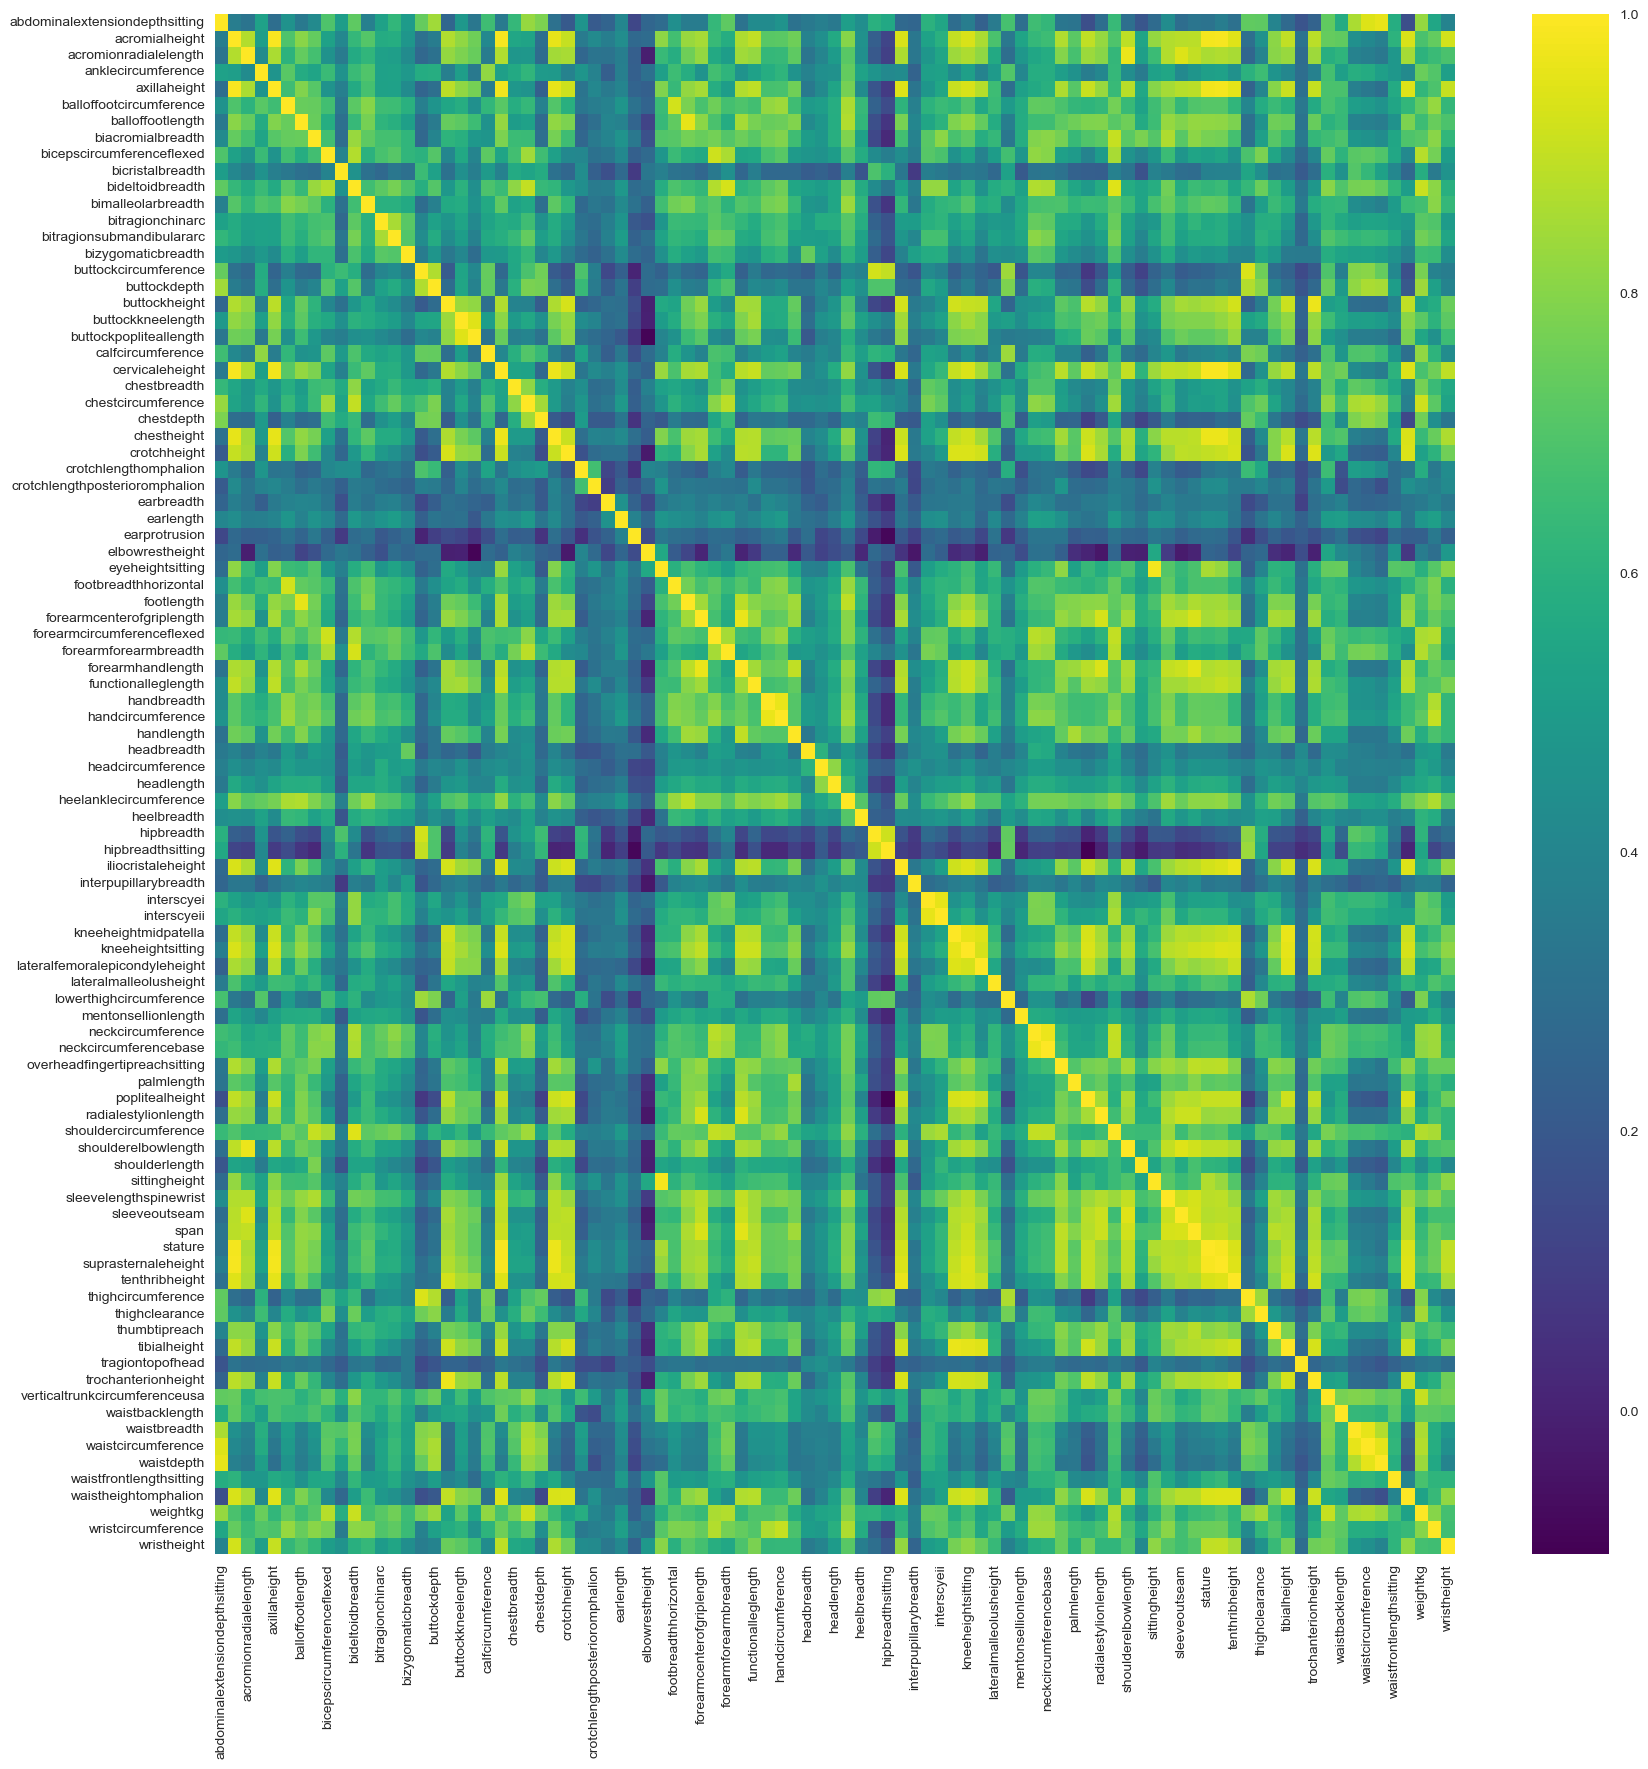

In [671]:
# Select only numeric columns from your DataFrame
numeric_df = new_df.select_dtypes(include=[np.number])

# Create a correlation heatmap for the numeric columns
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_df.corr(), cmap="viridis")


In [672]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  6068 non-null   int64 
 1   acromialheight                  6068 non-null   int64 
 2   acromionradialelength           6068 non-null   int64 
 3   anklecircumference              6068 non-null   int64 
 4   axillaheight                    6068 non-null   int64 
 5   balloffootcircumference         6068 non-null   int64 
 6   balloffootlength                6068 non-null   int64 
 7   biacromialbreadth               6068 non-null   int64 
 8   bicepscircumferenceflexed       6068 non-null   int64 
 9   bicristalbreadth                6068 non-null   int64 
 10  bideltoidbreadth                6068 non-null   int64 
 11  bimalleolarbreadth              6068 non-null   int64 
 12  bitragionchinarc                6068 non-null   

In [673]:
def format_row_based_on_comparison(row):
    # Compare the second column with the first column
    if row.iloc[2] >= row.iloc[1]:
        return ['color: red'] * len(row)
    # max > (75% + (75% - 25%) * 1.5) or min < (25% - (75% - 25%) * 1.5)
    elif row.iloc[7] > (row.iloc[6] + (row.iloc[6] - row.iloc[4]) * 1.5) or row.iloc[3] < (row.iloc[4] - (row.iloc[6] - row.iloc[4]) * 1.5):
        return ['color: orange'] * len(row)
    else:
        return [''] * len(row)

In [674]:
styled_new_df = new_df.describe().T

styled_new_df


,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.00,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.00,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.00,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.00,225.0,235.00,293.0
axillaheight,6068.0,1299.608767,72.022286,1038.0,1249.00,1302.0,1349.00,1553.0
balloffootcircumference,6068.0,244.192650,16.845020,186.0,232.00,245.0,256.00,306.0
balloffootlength,6068.0,194.754614,13.516368,151.0,185.00,195.0,204.00,245.0
biacromialbreadth,6068.0,399.204186,30.236914,283.0,376.00,404.0,421.00,489.0
bicepscircumferenceflexed,6068.0,340.934245,41.519866,216.0,311.00,341.0,370.00,490.0
bicristalbreadth,6068.0,274.735003,19.221034,197.0,262.00,274.0,288.00,362.0


In [675]:


# Select only numeric columns
numeric_columns = new_df01.select_dtypes(include=['number'])

# Calculate quartiles and IQR for numeric columns
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.85)
IQR = Q3 - Q1

outlier_data = []

for column in numeric_columns.columns:
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    column_outliers = ((numeric_columns[column] < lower_bound) | (numeric_columns[column] > upper_bound))
    outlier_count = column_outliers.sum()
    outlier_data.append({'Column': column, 'Outlier Count': outlier_count})

outlier_counts = pd.DataFrame(outlier_data)
outlier_counts


,Column,Outlier Count
0,abdominalextensiondepthsitting,6
1,acromialheight,1
2,acromionradialelength,4
3,anklecircumference,4
4,axillaheight,1
5,balloffootcircumference,2
6,balloffootlength,2
7,biacromialbreadth,1
8,bicepscircumferenceflexed,0
9,bicristalbreadth,11


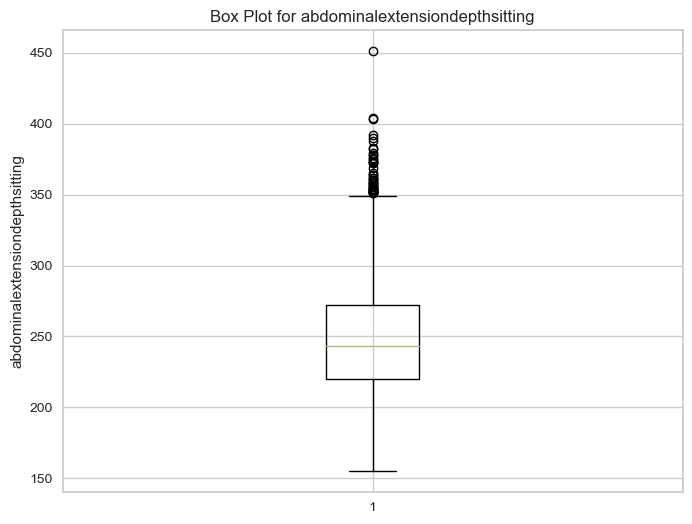

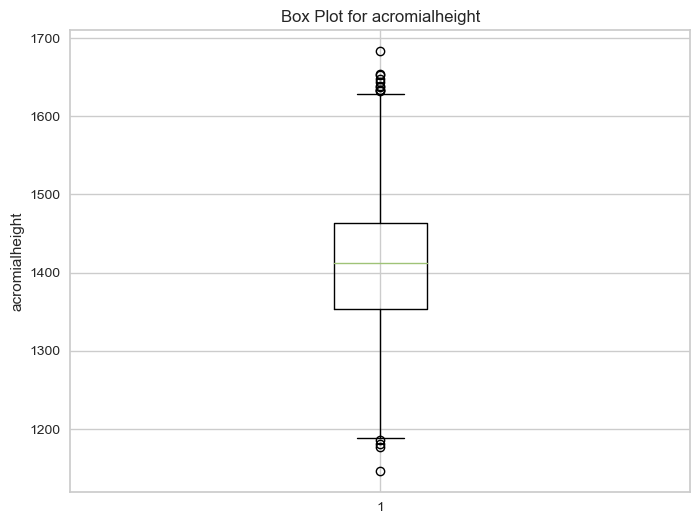

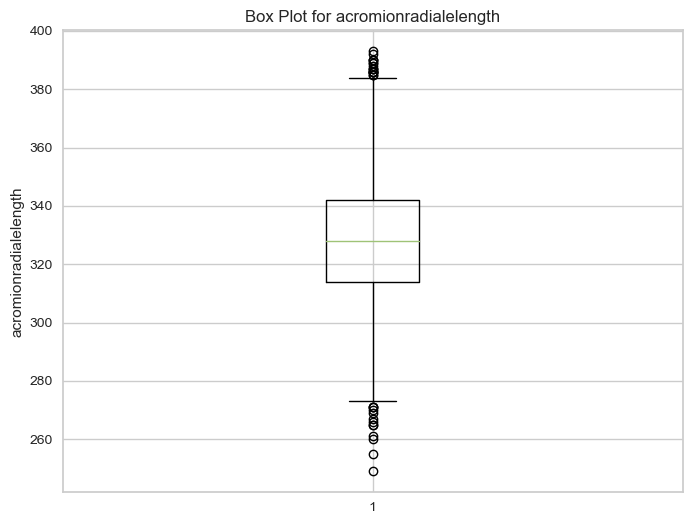

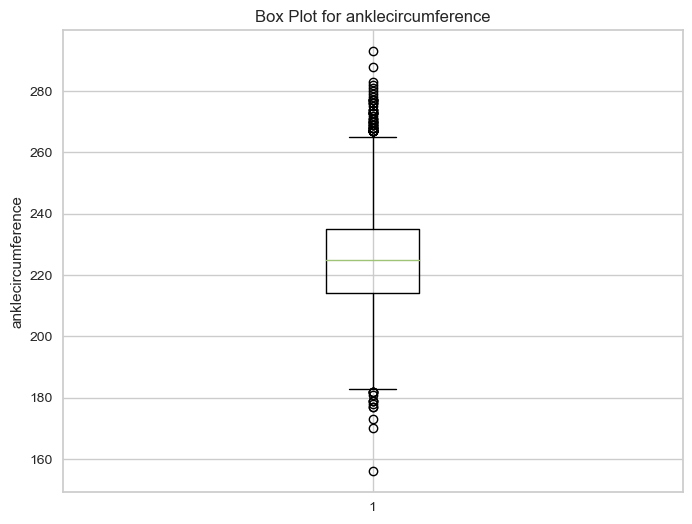

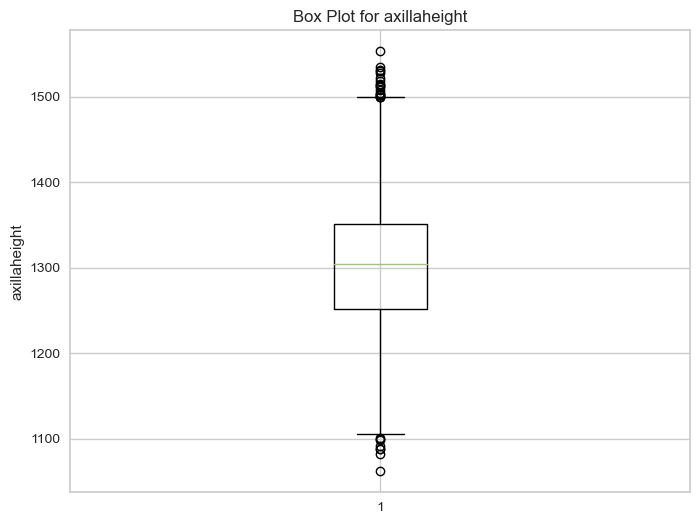

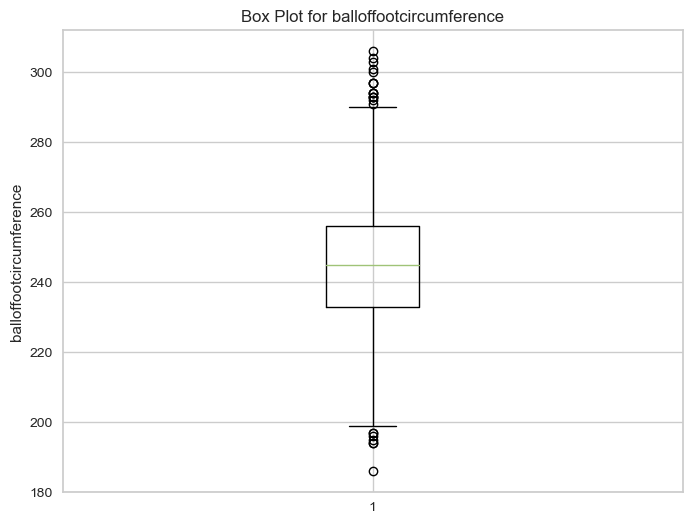

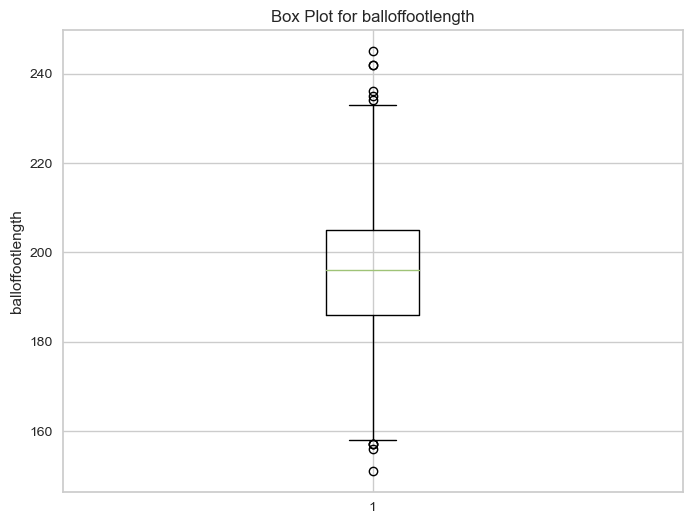

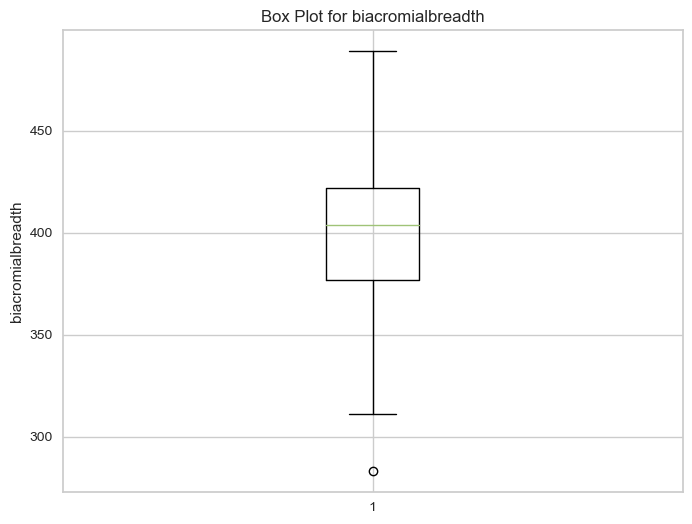

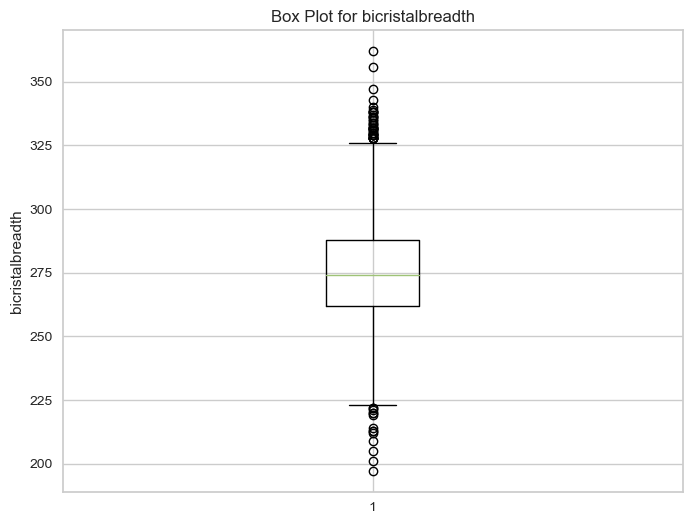

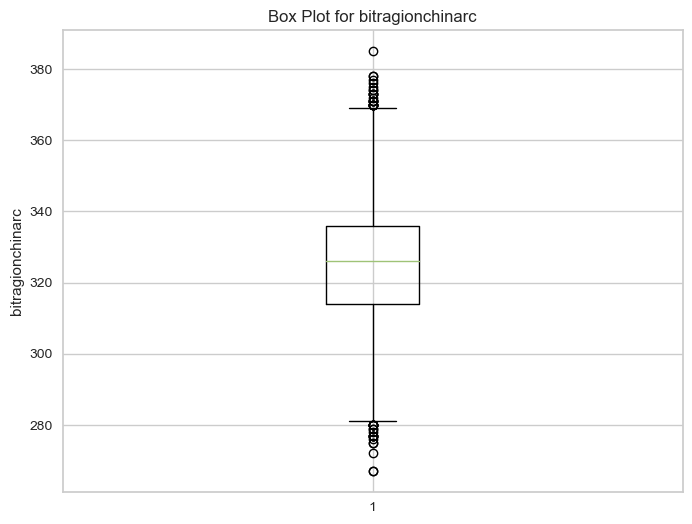

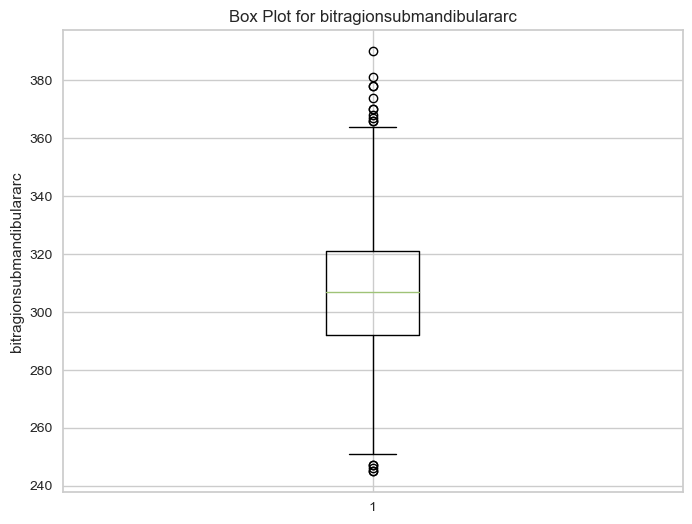

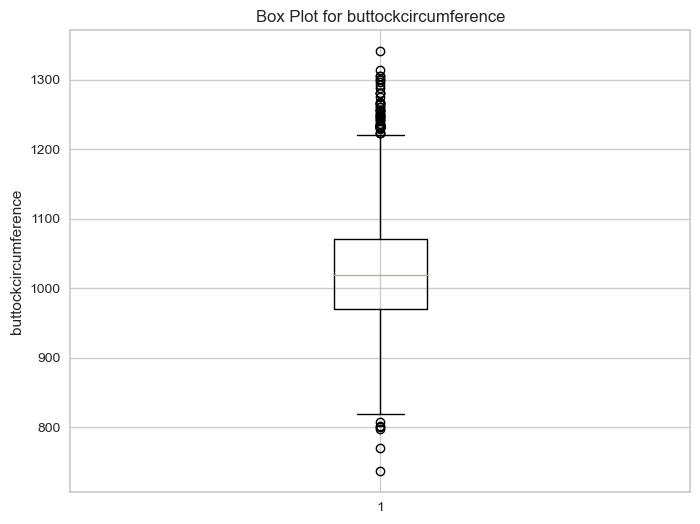

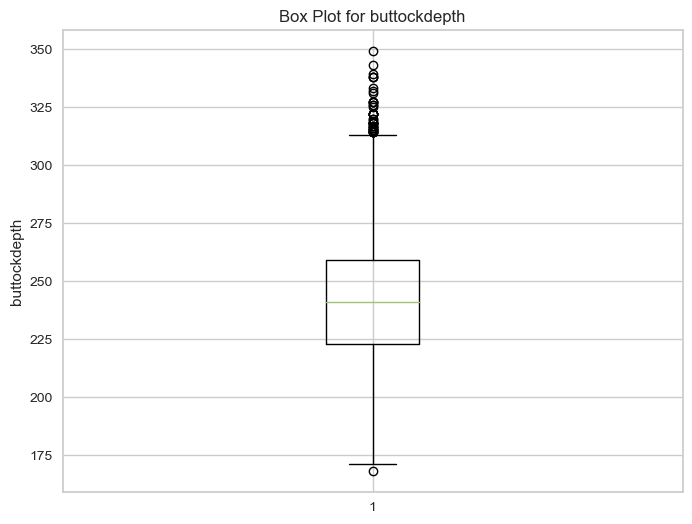

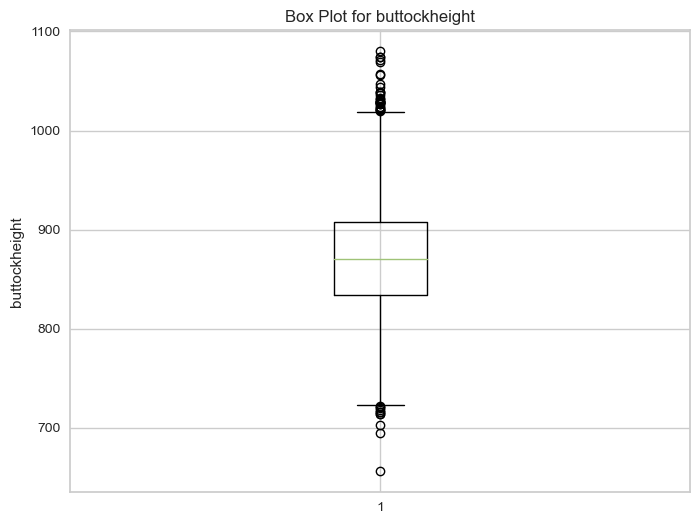

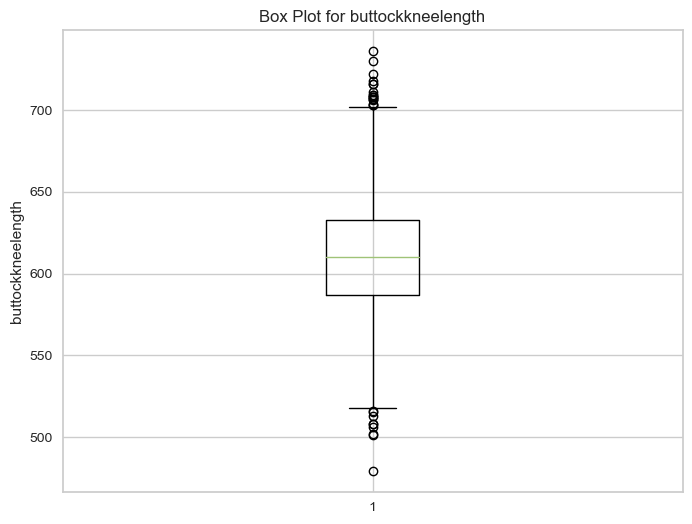

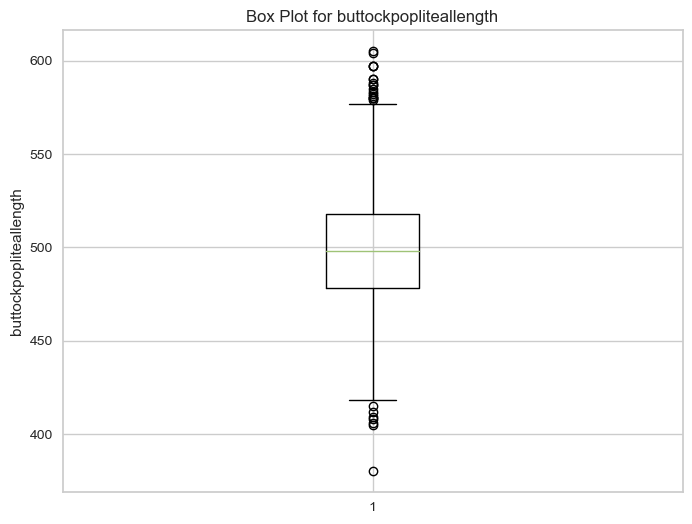

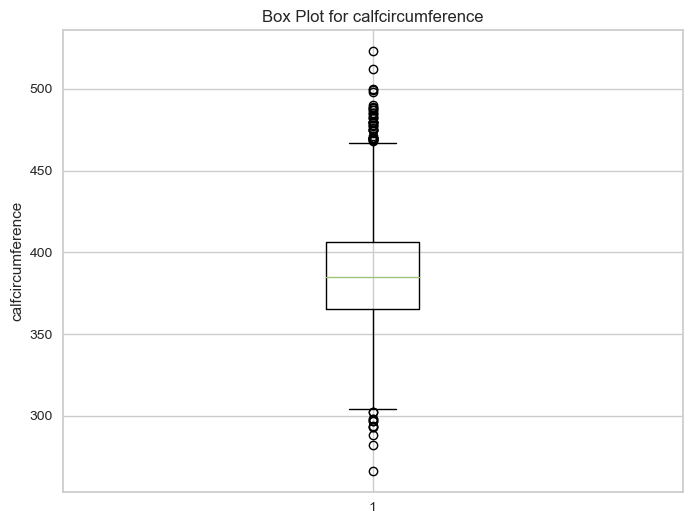

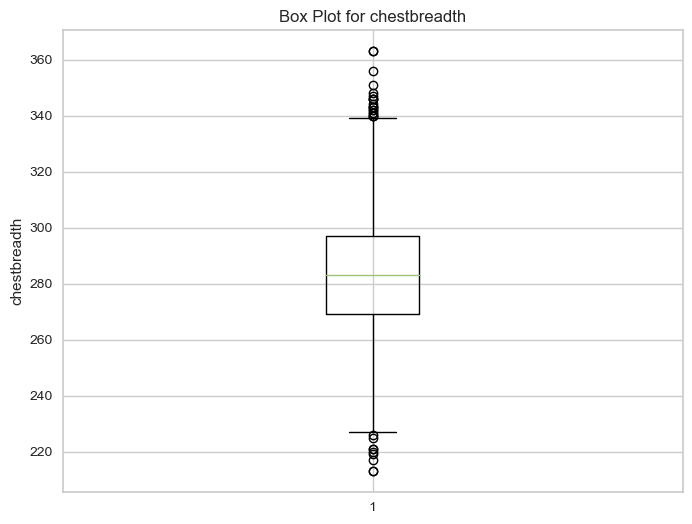

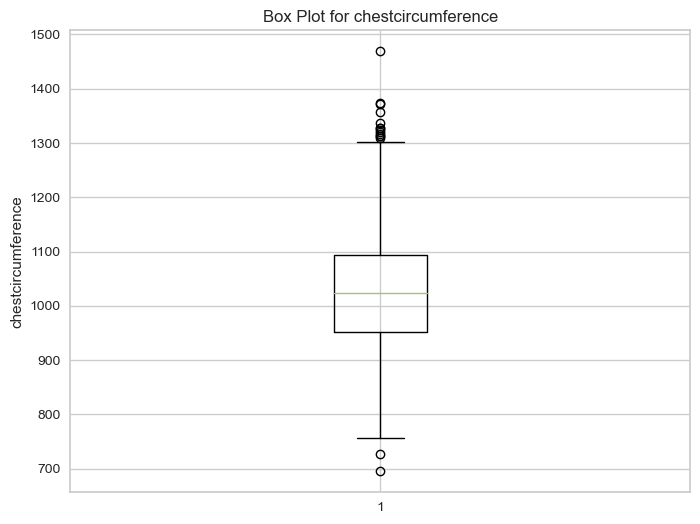

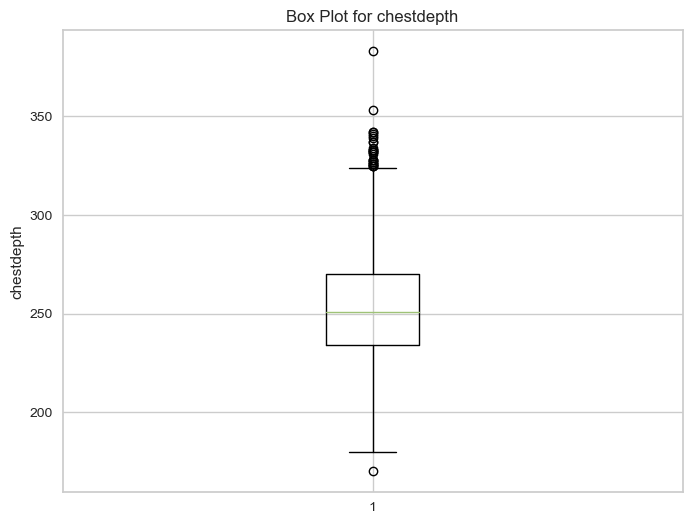

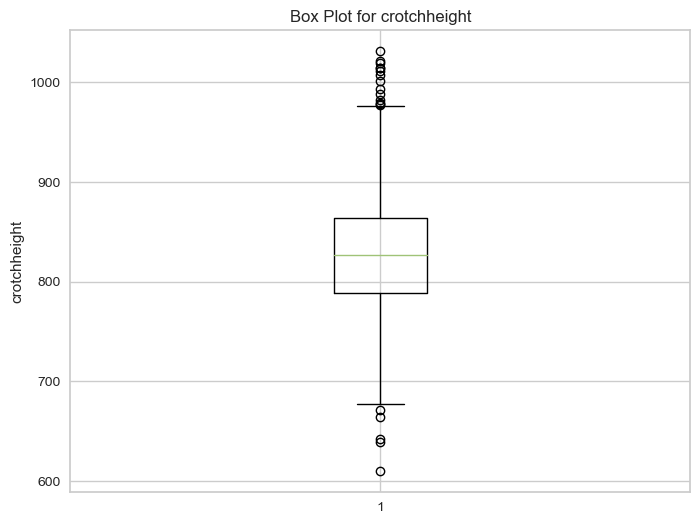

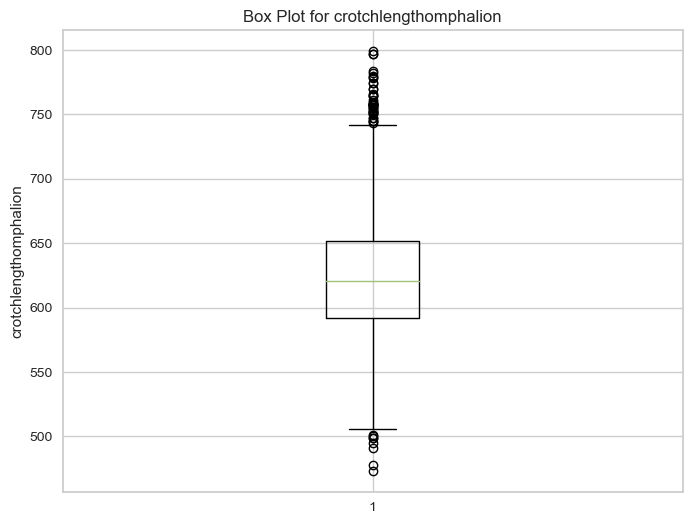

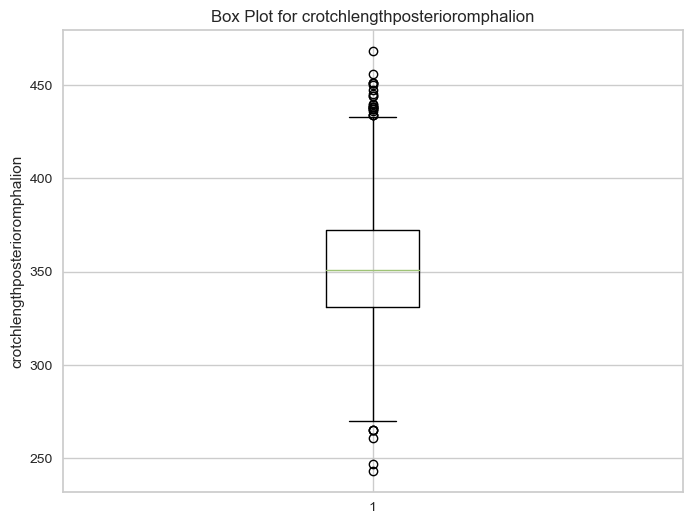

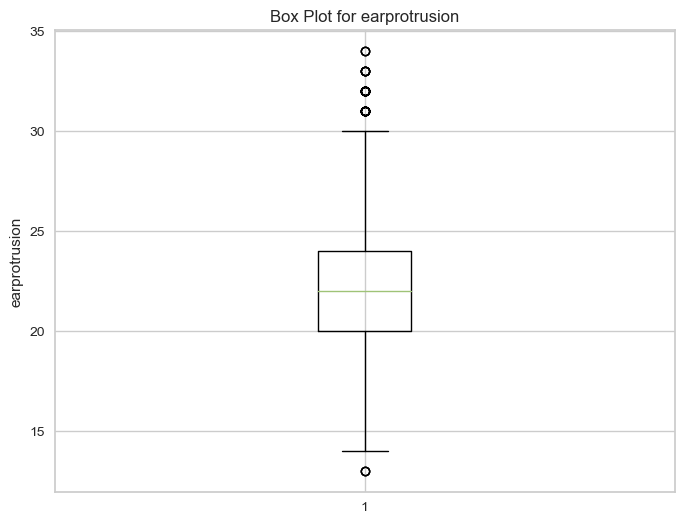

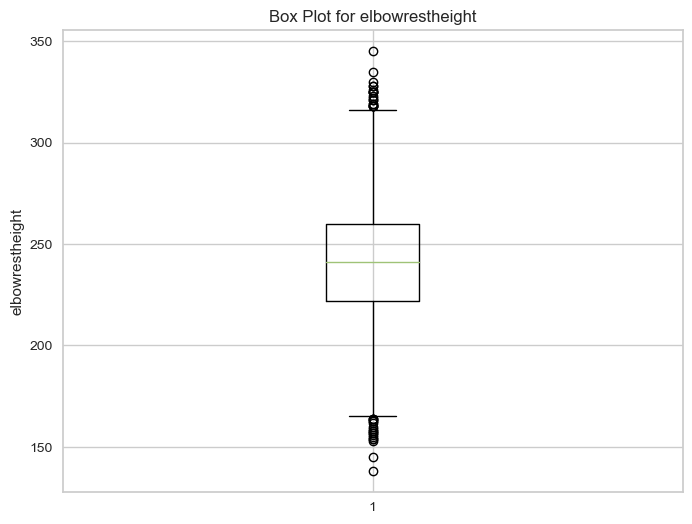

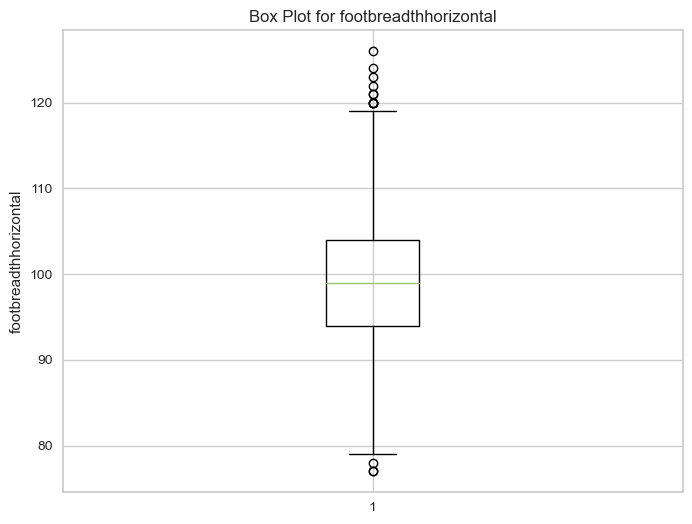

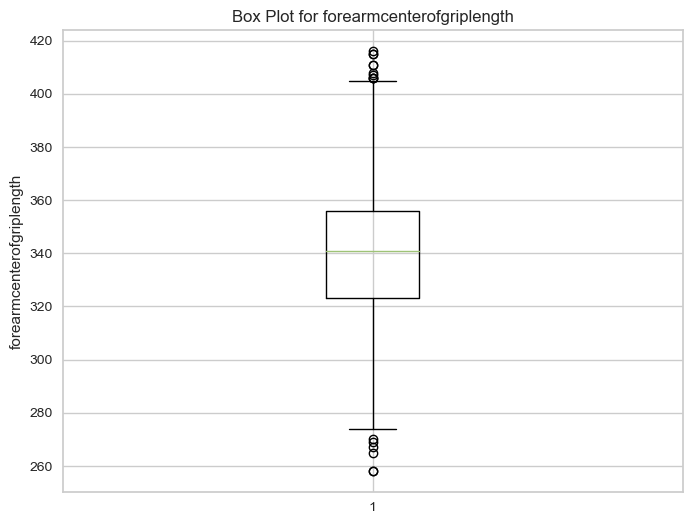

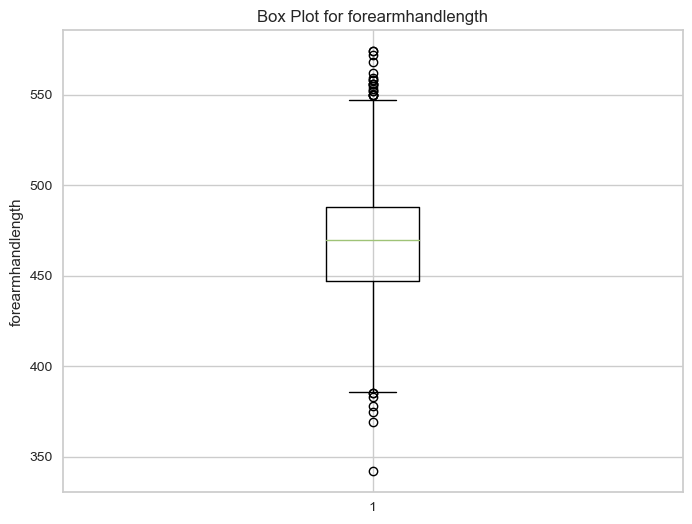

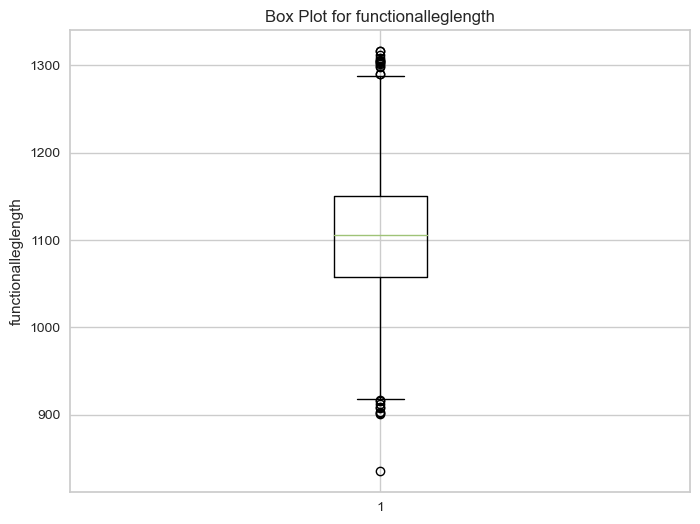

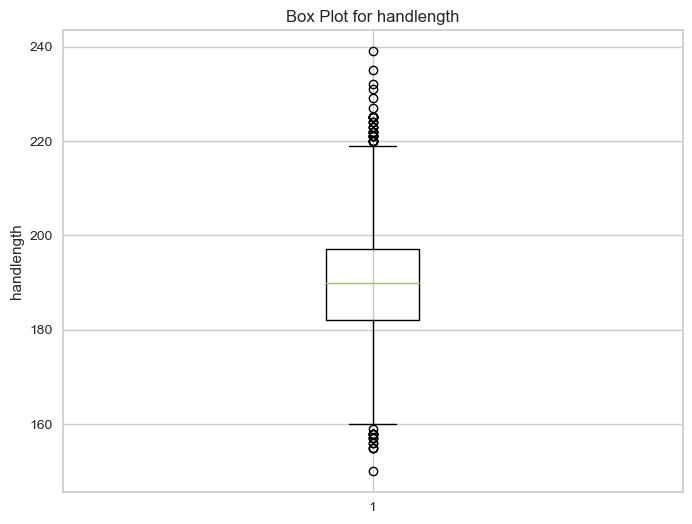

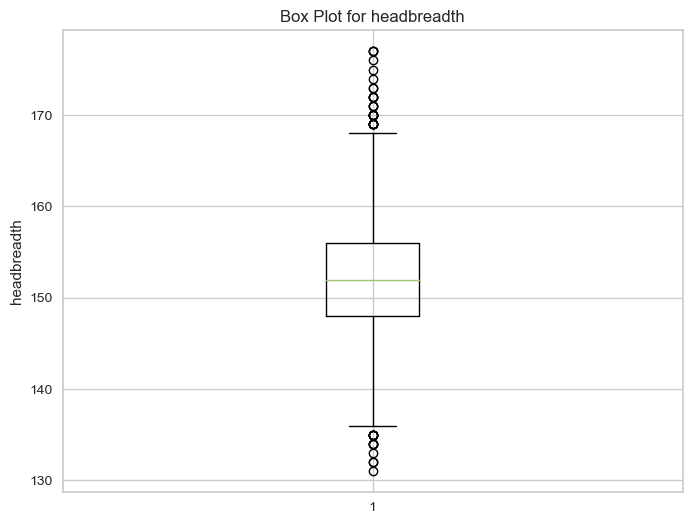

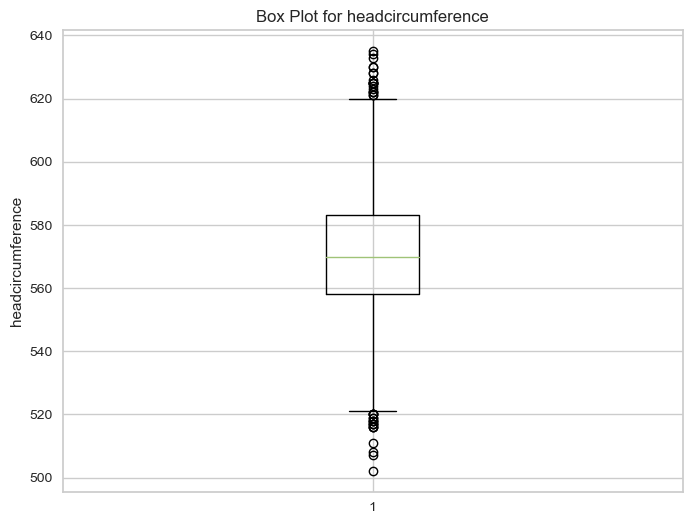

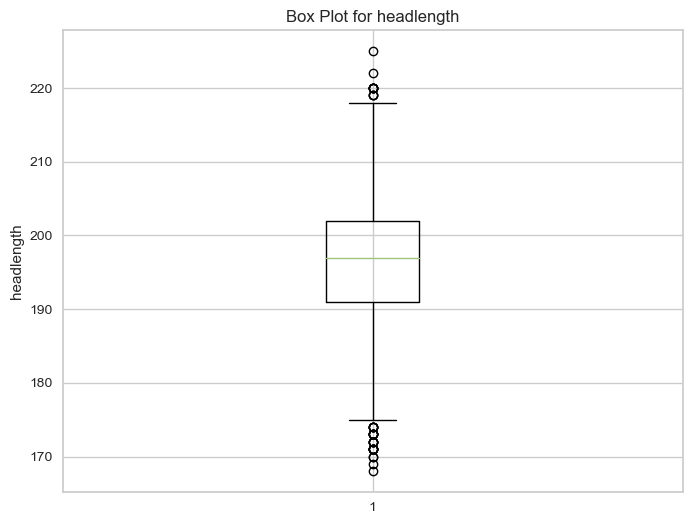

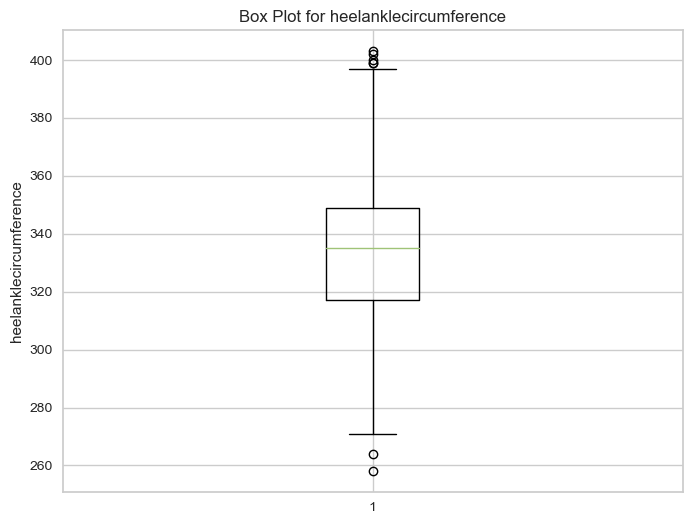

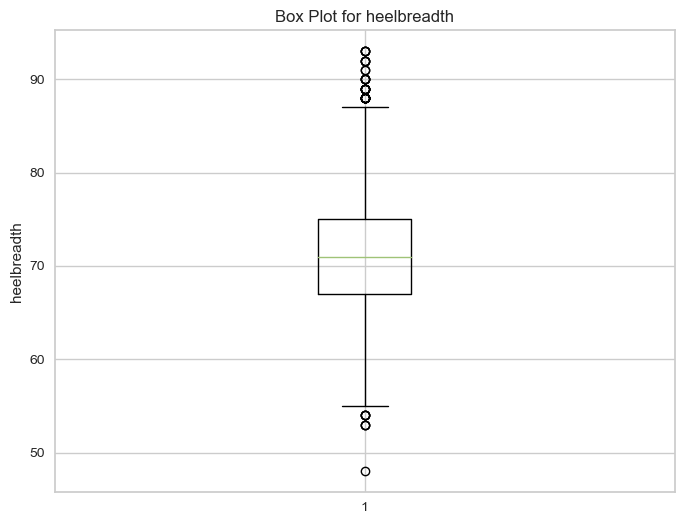

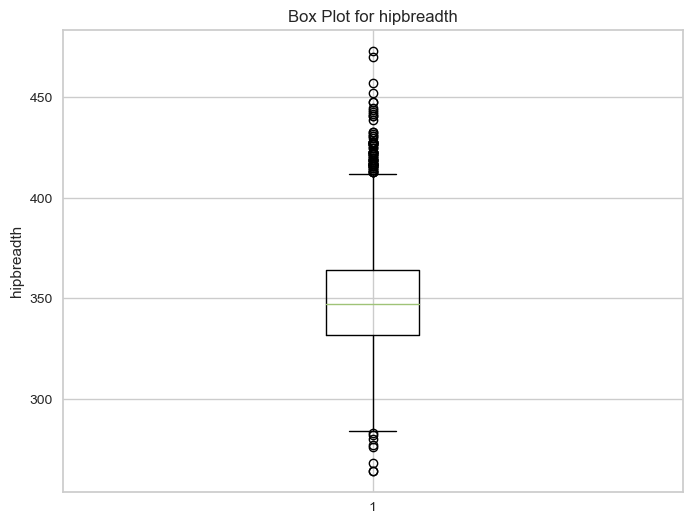

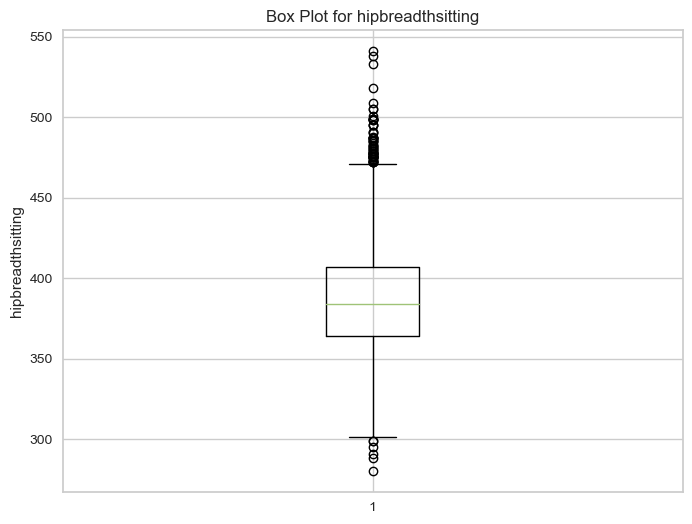

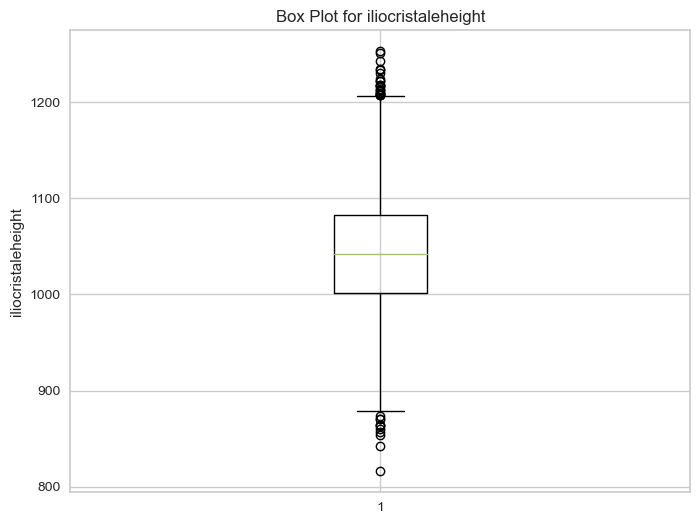

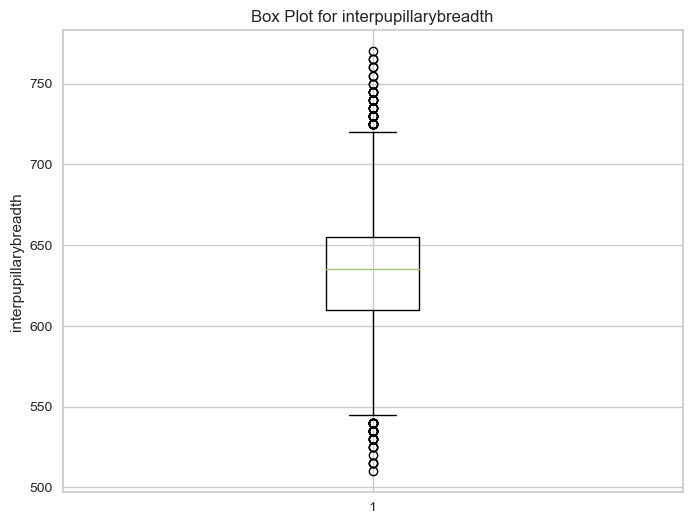

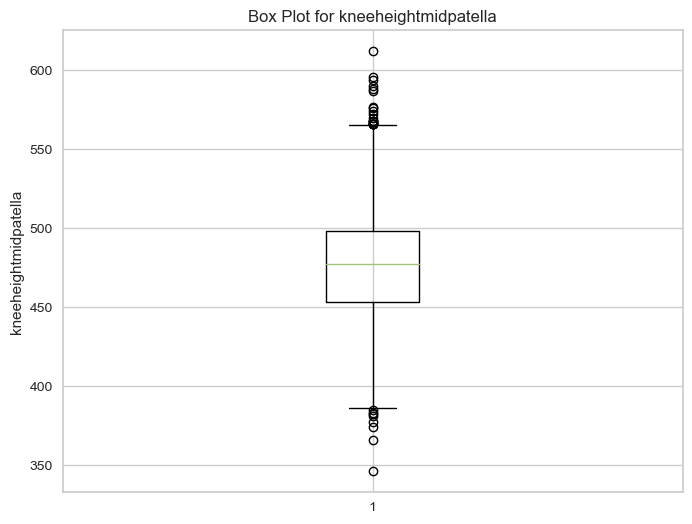

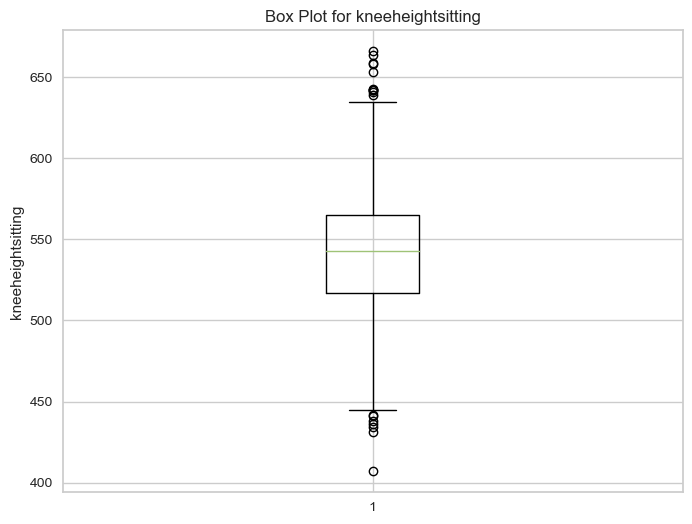

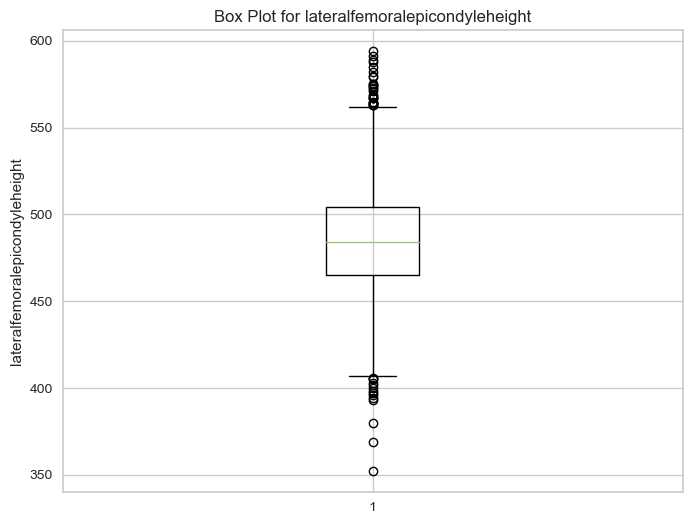

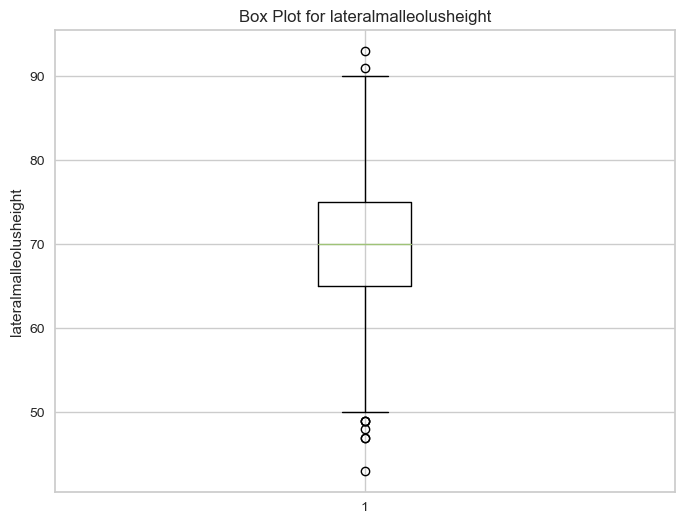

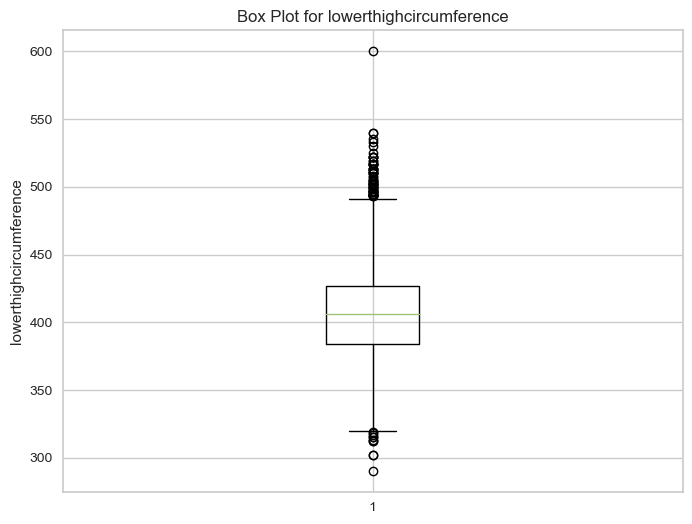

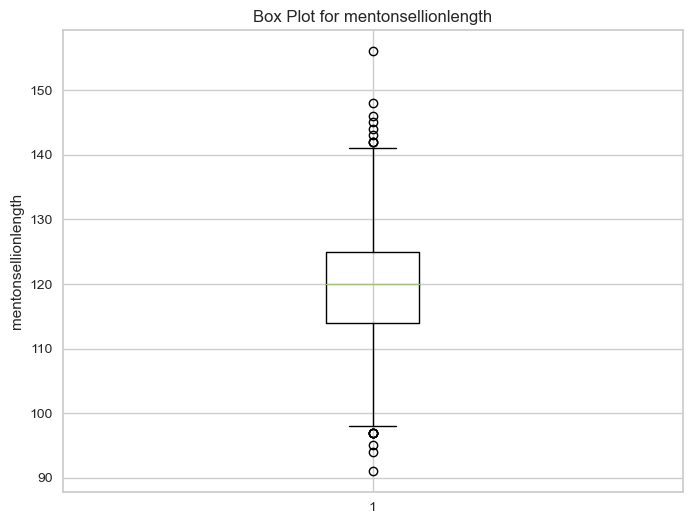

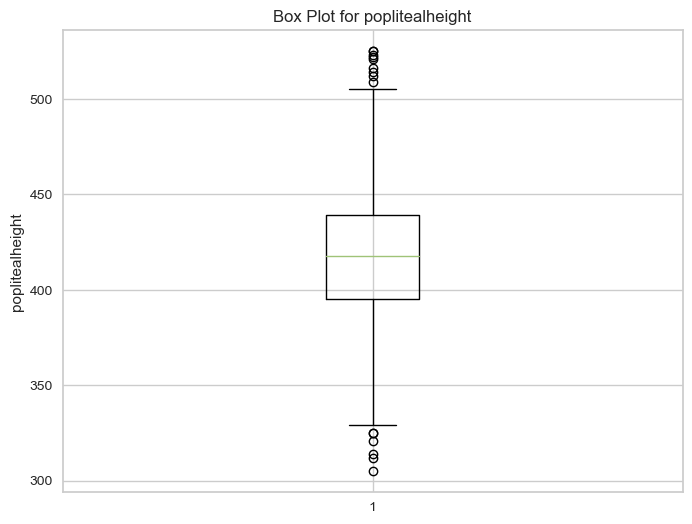

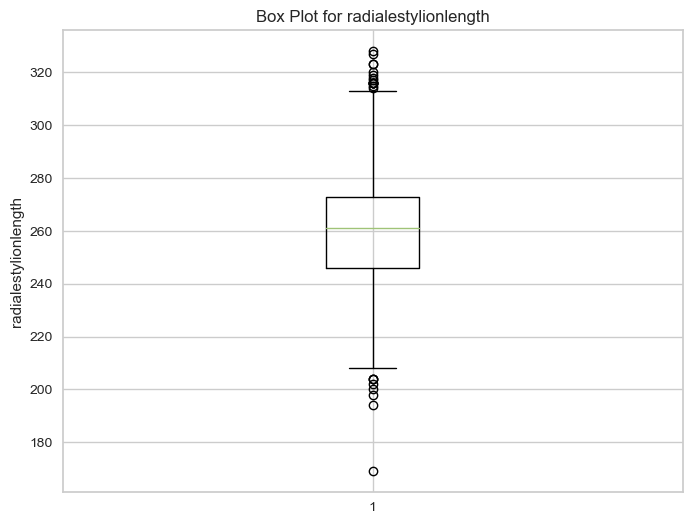

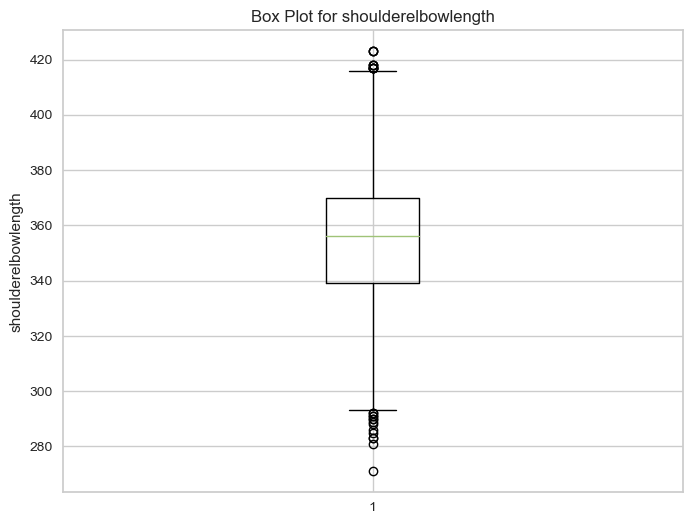

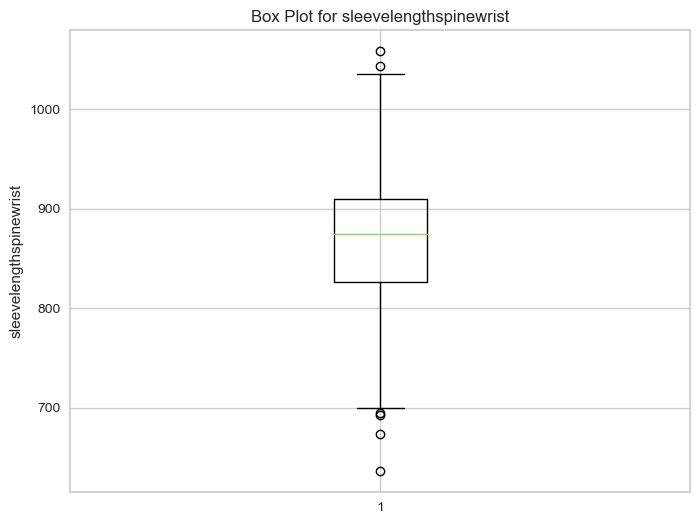

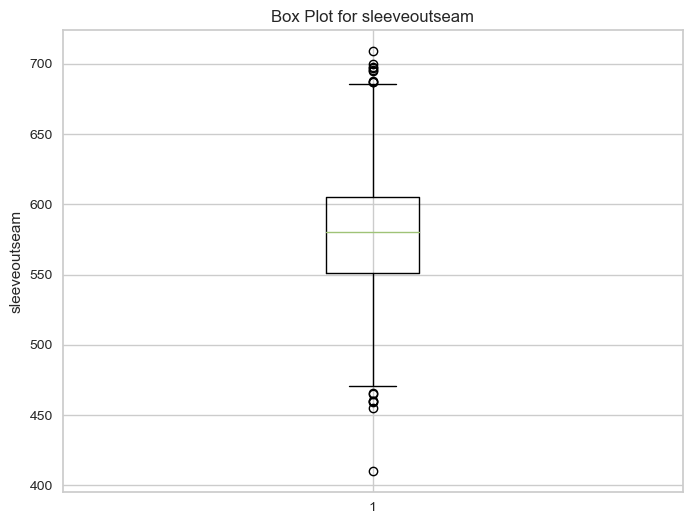

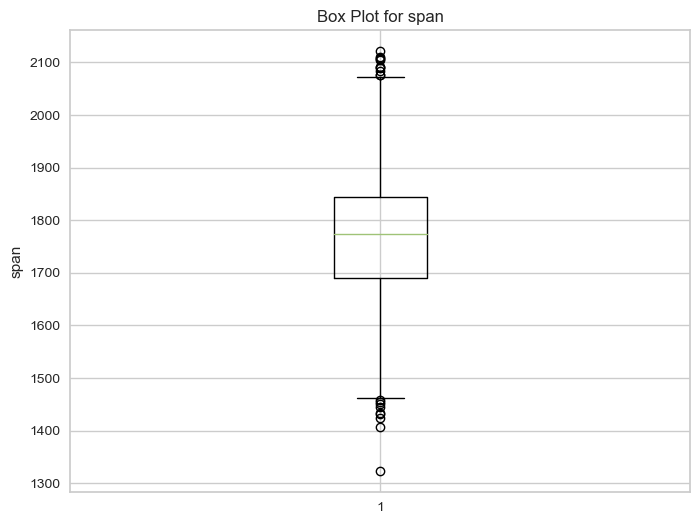

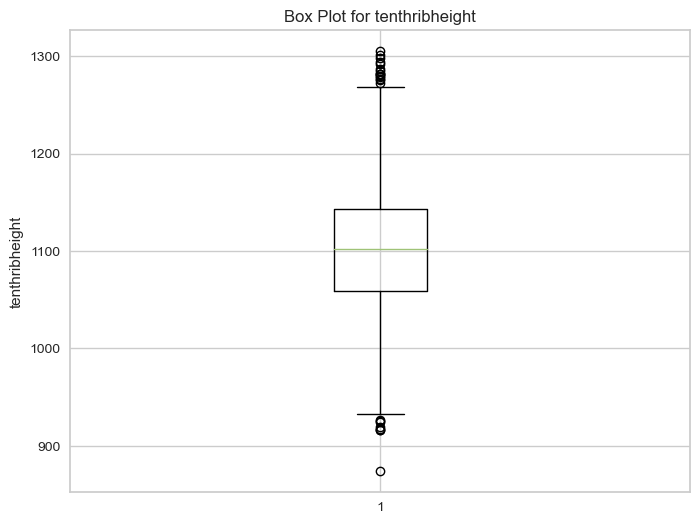

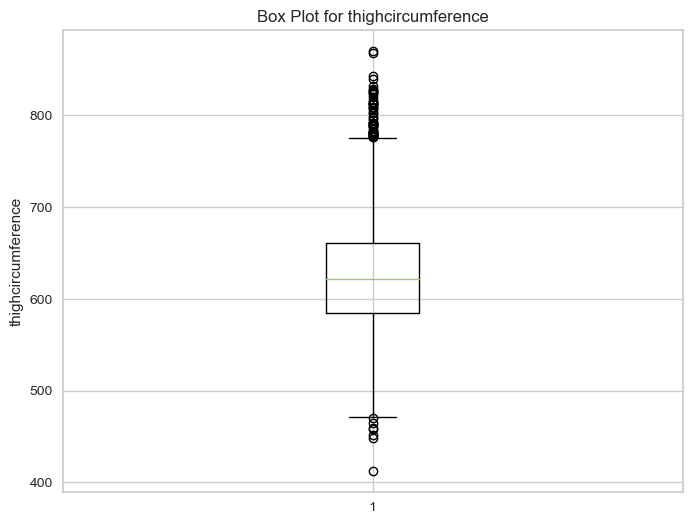

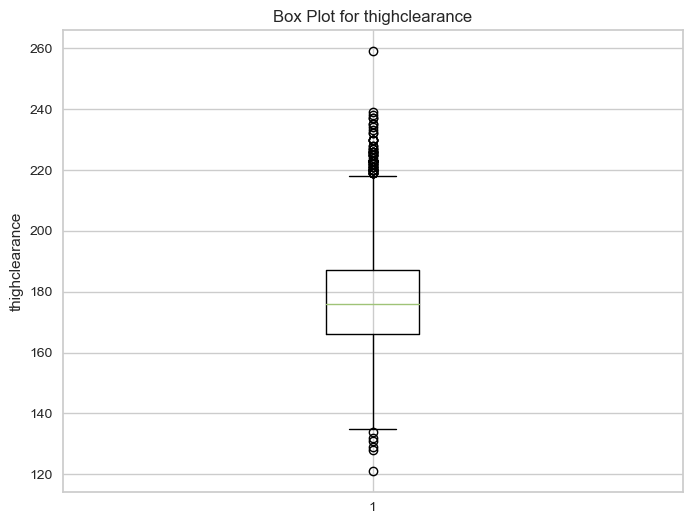

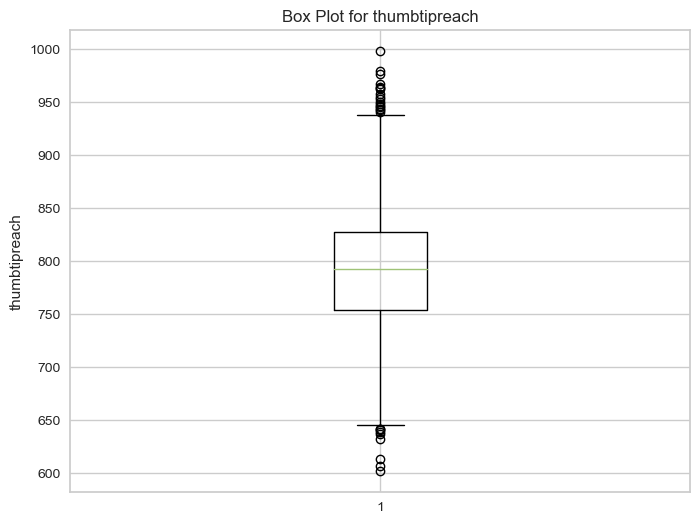

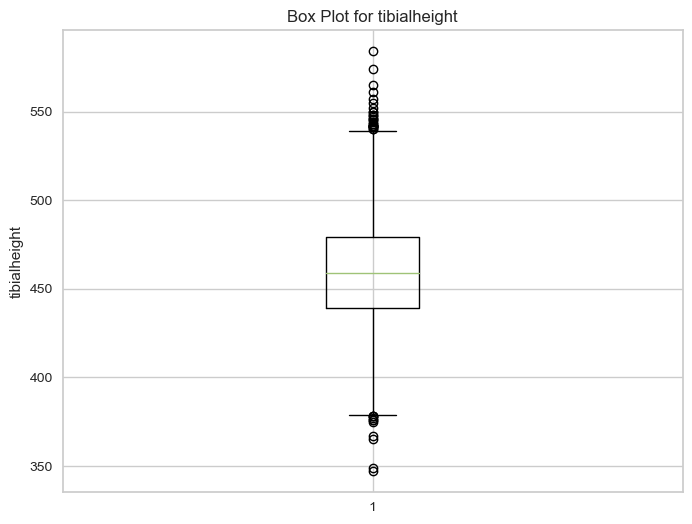

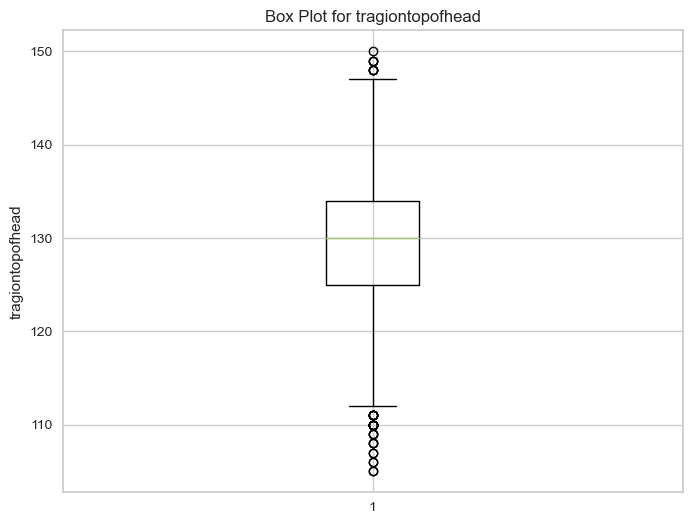

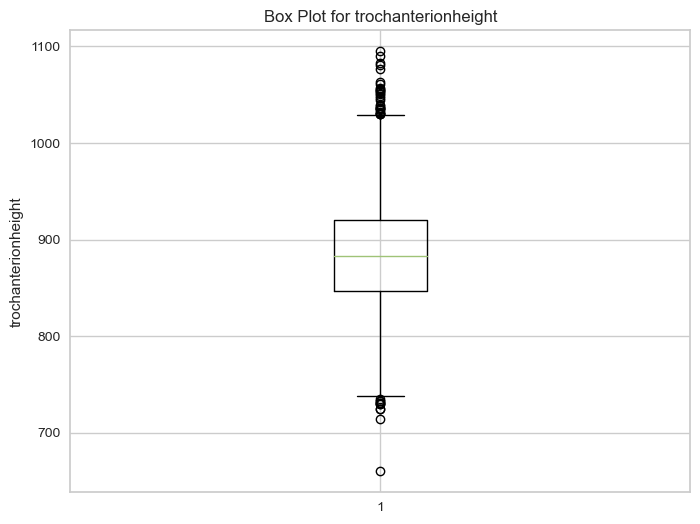

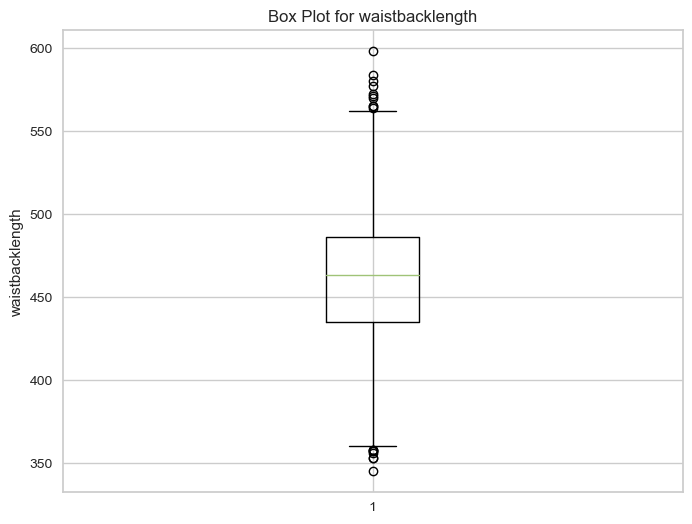

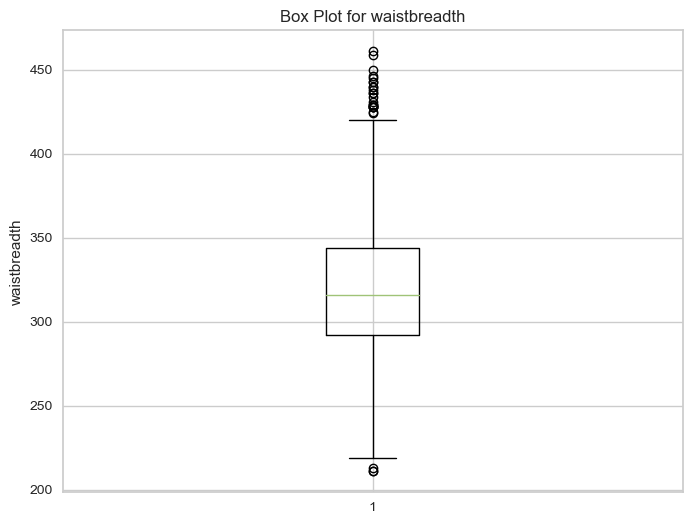

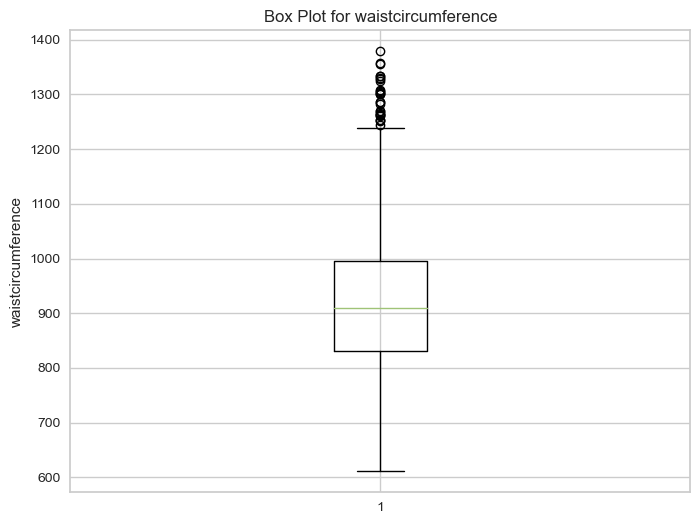

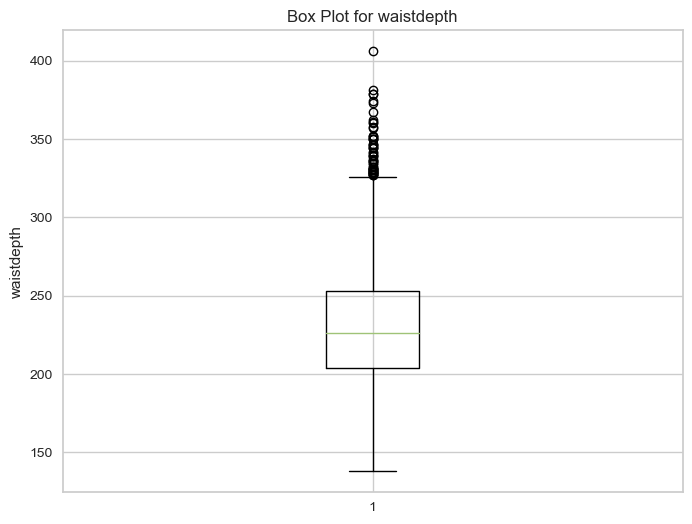

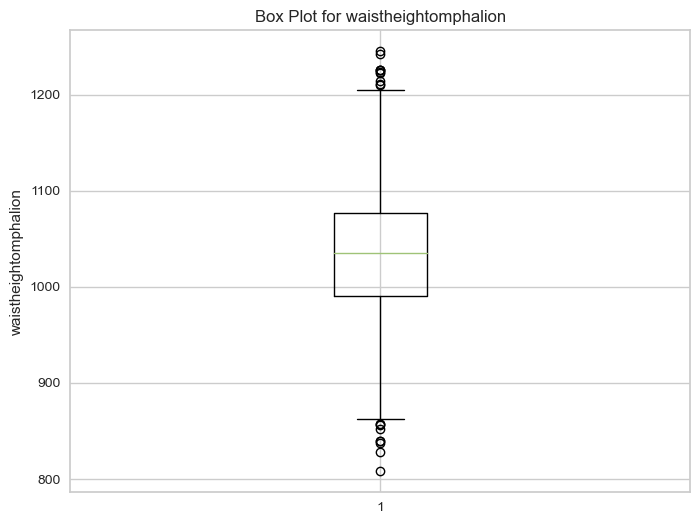

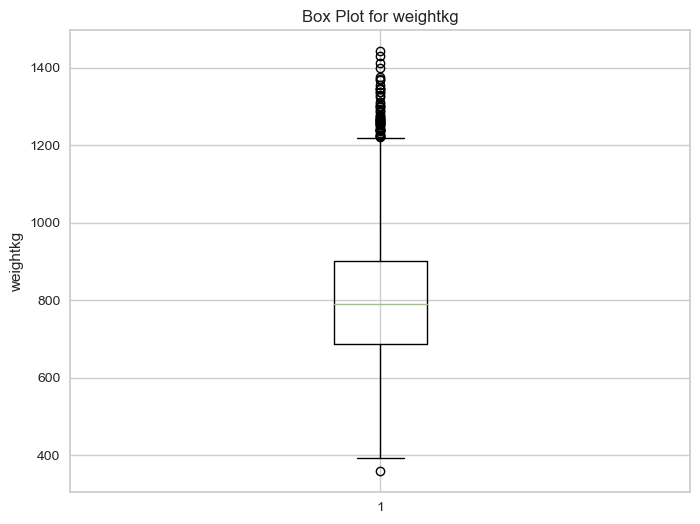

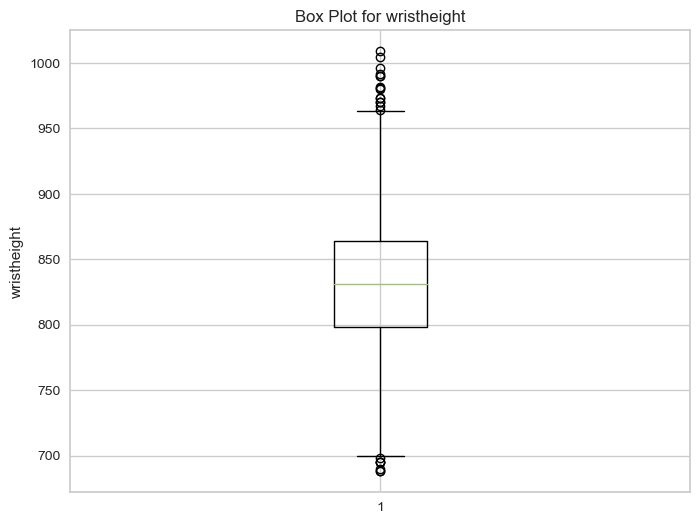

In [676]:


#list of numeric columns with outliers
columns_with_outliers = outlier_counts[outlier_counts['Outlier Count'] > 0]['Column'].tolist()

#box plot for each numeric column with outliers
for column in columns_with_outliers:
    plt.figure(figsize=(8, 6))
    plt.title(f'Box Plot for {column}')
    plt.boxplot(new_df01[column])
    plt.ylabel(column)
    plt.show()


# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [677]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [678]:
X = new_df01.drop(columns=["DODRace"])
y = new_df01.DODRace

In [679]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [680]:
print("X Train shape : ", X_train.shape)
print("y Train shape : ", y_train.shape)
print("X Test shape  : ", X_test.shape)
print("y Test shape  : ", y_test.shape)

X Train shape :  (4038, 95)
y Train shape :  (4038,)
X Test shape  :  (1731, 95)
y Test shape  :  (1731,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [760]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [682]:
cat = X_train.select_dtypes("object").columns
cat 

Index(['Gender', 'SubjectsBirthLocation'], dtype='object')

In [683]:
Logistic_Model = LogisticRegression()
Standard_Scaler = StandardScaler()

In [684]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
pipe_log_model = Pipeline(steps=operations)

In [685]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=42))]

pipe_log_model = Pipeline(steps=operations)

In [686]:
pipe_log_model.fit(X_train, y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[351  31   7]
 [ 21 147  36]
 [ 18 194 926]]
              precision    recall  f1-score   support

       Black       0.90      0.90      0.90       389
    Hispanic       0.40      0.72      0.51       204
       White       0.96      0.81      0.88      1138

    accuracy                           0.82      1731
   macro avg       0.75      0.81      0.76      1731
weighted avg       0.88      0.82      0.84      1731


Train_Set
[[ 818   63   28]
 [  39  347   89]
 [  68  470 2116]]
              precision    recall  f1-score   support

       Black       0.88      0.90      0.89       909
    Hispanic       0.39      0.73      0.51       475
       White       0.95      0.80      0.87      2654

    accuracy                           0.81      4038
   macro avg       0.74      0.81      0.76      4038
weighted avg       0.87      0.81      0.83      4038



In [687]:
scoring = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"]),
           "f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"])}

In [688]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=42))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.359273
train_precision_Hispanic    0.395811
test_recall_Hispanic        0.675177
train_recall_Hispanic       0.735668
test_f1_Hispanic            0.468122
train_f1_Hispanic           0.514693
dtype: float64

### Logistic Model GridsearchCV

In [689]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [690]:
param_grid = {
    "log__C": [0.5, 1],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [691]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=42))]

model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [692]:
log_model_grid.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


/Users/marammahal/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/marammahal/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/marammahal/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/marammahal/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sp

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'log__C': [0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [761]:
log_model_grid.best_params_

{'log__C': 1, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [694]:
log_model_grid.best_score_

0.6751773049645391

In [695]:
log_model_grid.best_index_

7

In [696]:
pd.DataFrame(log_model_grid.cv_results_).loc[
    log_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.675177
mean_train_score    0.735903
Name: 7, dtype: object

In [697]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[351  31   7]
 [ 21 147  36]
 [ 18 194 926]]
              precision    recall  f1-score   support

       Black       0.90      0.90      0.90       389
    Hispanic       0.40      0.72      0.51       204
       White       0.96      0.81      0.88      1138

    accuracy                           0.82      1731
   macro avg       0.75      0.81      0.76      1731
weighted avg       0.88      0.82      0.84      1731


Train_Set
[[ 818   63   28]
 [  39  347   89]
 [  68  470 2116]]
              precision    recall  f1-score   support

       Black       0.88      0.90      0.89       909
    Hispanic       0.39      0.73      0.51       475
       White       0.95      0.80      0.87      2654

    accuracy                           0.81      4038
   macro avg       0.74      0.81      0.76      4038
weighted avg       0.87      0.81      0.83      4038



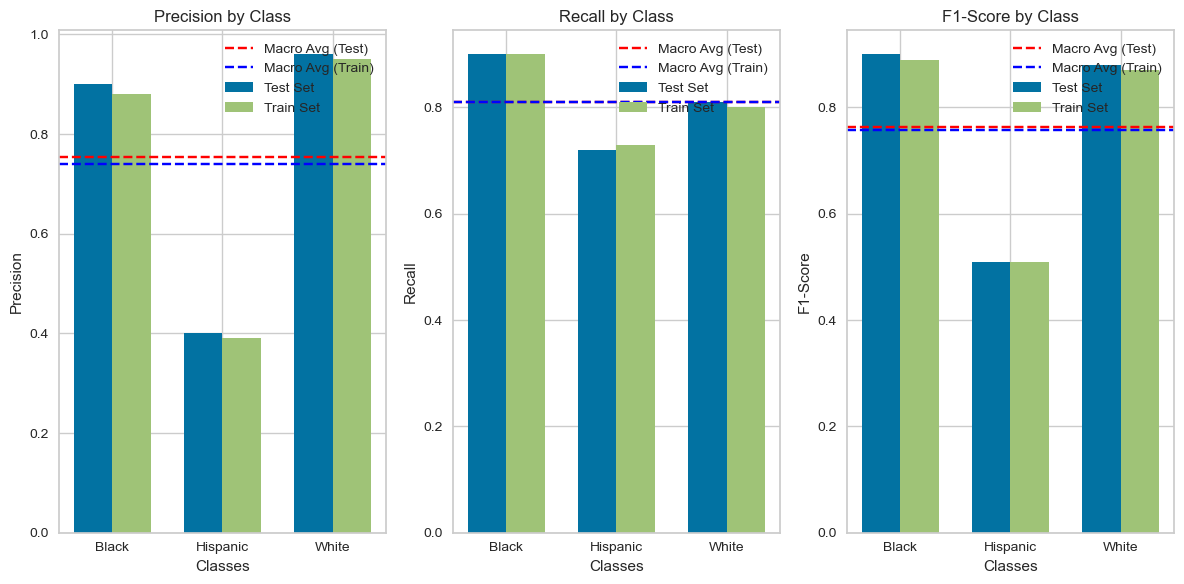

In [804]:


# Define the classes and metrics
classes = ["Black", "Hispanic", "White"]
precision_test = [0.90, 0.40, 0.96]
recall_test = [0.90, 0.72, 0.81]
f1_test = [0.90, 0.51, 0.88]

precision_train = [0.88, 0.39, 0.95]
recall_train = [0.90, 0.73, 0.80]
f1_train = [0.89, 0.51, 0.87]

# Macro and weighted averages
macro_precision_test = np.mean(precision_test)
macro_recall_test = np.mean(recall_test)
macro_f1_test = np.mean(f1_test)

macro_precision_train = np.mean(precision_train)
macro_recall_train = np.mean(recall_train)
macro_f1_train = np.mean(f1_train)

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(classes))

# Create subplots for each metric
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.bar(index - bar_width/2, precision_test, bar_width, label='Test Set')
plt.bar(index + bar_width/2, precision_train, bar_width, label='Train Set')
plt.axhline(y=macro_precision_test, color='red', linestyle='--', label='Macro Avg (Test)')
plt.axhline(y=macro_precision_train, color='blue', linestyle='--', label='Macro Avg (Train)')
plt.xlabel('Classes')
plt.ylabel('Precision')
plt.title('Precision by Class')
plt.xticks(index, classes)
plt.legend()

plt.subplot(132)
plt.bar(index - bar_width/2, recall_test, bar_width, label='Test Set')
plt.bar(index + bar_width/2, recall_train, bar_width, label='Train Set')
plt.axhline(y=macro_recall_test, color='red', linestyle='--', label='Macro Avg (Test)')
plt.axhline(y=macro_recall_train, color='blue', linestyle='--', label='Macro Avg (Train)')
plt.xlabel('Classes')
plt.ylabel('Recall')
plt.title('Recall by Class')
plt.xticks(index, classes)
plt.legend()

plt.subplot(133)
plt.bar(index - bar_width/2, f1_test, bar_width, label='Test Set')
plt.bar(index + bar_width/2, f1_train, bar_width, label='Train Set')
plt.axhline(y=macro_f1_test, color='red', linestyle='--', label='Macro Avg (Test)')
plt.axhline(y=macro_f1_train, color='blue', linestyle='--', label='Macro Avg (Train)')
plt.xlabel('Classes')
plt.ylabel('F1-Score')
plt.title('F1-Score by Class')
plt.xticks(index, classes)
plt.legend()

plt.tight_layout()
plt.show()

## 2. SVC

### Vanilla SVC model

In [699]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced",random_state=42))]

pipe_svc_model = Pipeline(steps=operations_svc)

In [777]:
X00 = new_df01.drop("DODRace",axis=1)
y = new_df01.DODRace    

In [778]:
cat = X00.select_dtypes("object").columns
cat

Index(['SubjectsBirthLocation'], dtype='object')

In [779]:
enc = OrdinalEncoder()

In [780]:
X2[cat] = enc.fit_transform(X2[cat])  
X2.head(3)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,0.0,2.0
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,0.0,3.0
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,0.0,3.0


In [781]:
X_train00, X_test00, y_train00, y_test00 = train_test_split(X00, y, test_size=0.2, random_state=42, stratify =y)


In [782]:
print("Train00 shape : ", X_train00.shape)
print("Train00 shape : ", y_train00.shape)
print("Test00 shape  : ", X_test00.shape)
print("Test00 shape  : ", y_test00.shape)

Train00 shape :  (4615, 95)
Train00 shape :  (4615,)
Test00 shape  :  (1154, 95)
Test00 shape  :  (1154,)


In [783]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)

In [785]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train00, y_train00)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [786]:
eval_metric(pipe_model_rf, X_train00, y_train00, X_test00, y_test00)

Test_Set
[[183   1  76]
 [  9   7 120]
 [  8   1 749]]
              precision    recall  f1-score   support

       Black       0.92      0.70      0.80       260
    Hispanic       0.78      0.05      0.10       136
       White       0.79      0.99      0.88       758

    accuracy                           0.81      1154
   macro avg       0.83      0.58      0.59      1154
weighted avg       0.82      0.81      0.77      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



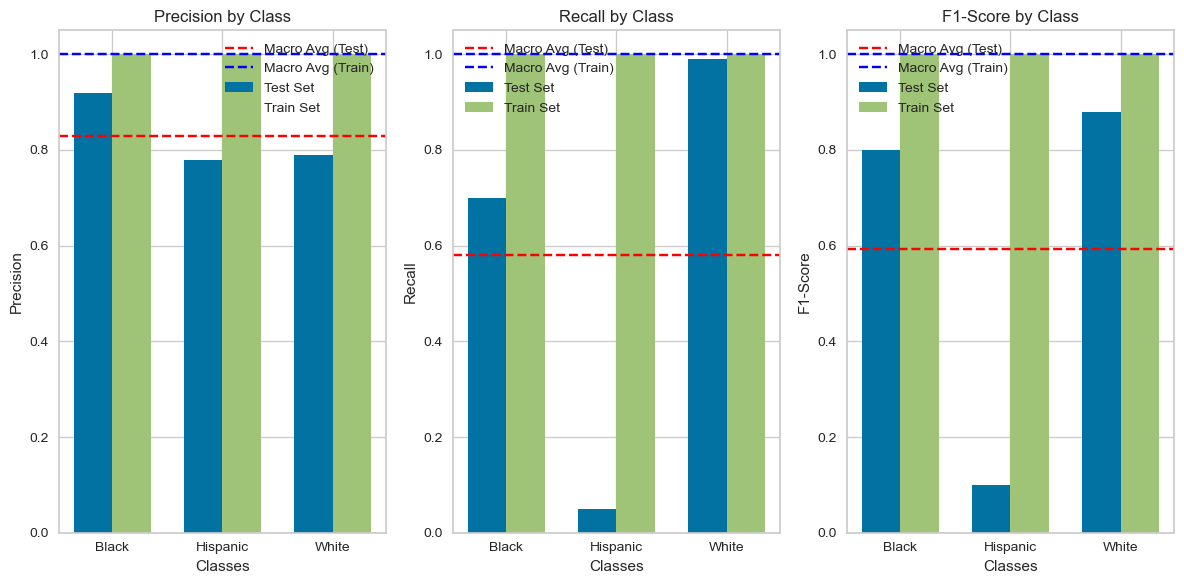

In [805]:

# Define the classes and metrics
classes = ["Black", "Hispanic", "White"]
precision_test = [0.92, 0.78, 0.79]
recall_test = [0.70, 0.05, 0.99]
f1_test = [0.80, 0.10, 0.88]

precision_train = [1.00, 1.00, 1.00]
recall_train = [1.00, 1.00, 1.00]
f1_train = [1.00, 1.00, 1.00]

# Macro and weighted averages
macro_precision_test = np.mean(precision_test)
macro_recall_test = np.mean(recall_test)
macro_f1_test = np.mean(f1_test)

macro_precision_train = np.mean(precision_train)
macro_recall_train = np.mean(recall_train)
macro_f1_train = np.mean(f1_train)

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(classes))

# Create subplots for each metric
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.bar(index - bar_width/2, precision_test, bar_width, label='Test Set')
plt.bar(index + bar_width/2, precision_train, bar_width, label='Train Set')
plt.axhline(y=macro_precision_test, color='red', linestyle='--', label='Macro Avg (Test)')
plt.axhline(y=macro_precision_train, color='blue', linestyle='--', label='Macro Avg (Train)')
plt.xlabel('Classes')
plt.ylabel('Precision')
plt.title('Precision by Class')
plt.xticks(index, classes)
plt.legend()

plt.subplot(132)
plt.bar(index - bar_width/2, recall_test, bar_width, label='Test Set')
plt.bar(index + bar_width/2, recall_train, bar_width, label='Train Set')
plt.axhline(y=macro_recall_test, color='red', linestyle='--', label='Macro Avg (Test)')
plt.axhline(y=macro_recall_train, color='blue', linestyle='--', label='Macro Avg (Train)')
plt.xlabel('Classes')
plt.ylabel('Recall')
plt.title('Recall by Class')
plt.xticks(index, classes)
plt.legend()

plt.subplot(133)
plt.bar(index - bar_width/2, f1_test, bar_width, label='Test Set')
plt.bar(index + bar_width/2, f1_train, bar_width, label='Train Set')
plt.axhline(y=macro_f1_test, color='red', linestyle='--', label='Macro Avg (Test)')
plt.axhline(y=macro_f1_train, color='blue', linestyle='--', label='Macro Avg (Train)')
plt.xlabel('Classes')
plt.ylabel('F1-Score')
plt.title('F1-Score by Class')
plt.xticks(index, classes)
plt.legend()

plt.tight_layout()
plt.show()


###  SVC Model GridsearchCV

In [806]:
param_grid = {
    'svc__C': [0.5, 1],
    'svc__gamma': ["scale", "auto", 0.01, 0.1]
}

In [807]:
operations_svc = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(class_weight="balanced", random_state=42)),
]


In [808]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=42))]

In [809]:
model = Pipeline(steps=operations_svc)

In [810]:
svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [792]:
new_df01['Gender'] = new_df01['Gender'].replace({'Male':1, 'Female':0})
new_df01

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,0,Europe,Black
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,0,North America,Hispanic
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,0,North America,White
3,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,0,Other,Black
4,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,0,North America,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [793]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# List of columns you want to encode
columns_to_encode = ['Gender', 'SubjectsBirthLocation']

# Encode the specified columns
X_train00[columns_to_encode] = X_train00[columns_to_encode].apply(label_encoder.fit_transform)


In [794]:
svm_model_grid.fit(X_train00, y_train00)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 1],
                         'svc__gamma': ['scale', 'auto', 0.01, 0.1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [796]:
svm_model_grid.best_index_

7

In [797]:
svm_model_grid.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('svc',
                 SVC(C=1, class_weight='balanced', gamma=0.1,
                     random_state=42))])

In [798]:
svm_model_grid.best_params_

{'svc__C': 1, 'svc__gamma': 0.1}

In [799]:
svm_model_grid.best_score_

0.6683838383838384

In [800]:
pd.DataFrame(svm_model_grid.cv_results_).loc[3, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.666532
mean_train_score    0.711888
Name: 3, dtype: object

In [801]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# List of columns you want to encode
columns_to_encode = ['Gender', 'SubjectsBirthLocation']

# Encode the specified columns
X_test00[columns_to_encode] = X_test00[columns_to_encode].apply(label_encoder.fit_transform)


In [802]:
eval_metric(svm_model_grid, X_train00, y_train00, X_test00, y_test00)

Test_Set
[[235  20   5]
 [ 13  96  27]
 [ 14 128 616]]
              precision    recall  f1-score   support

       Black       0.90      0.90      0.90       260
    Hispanic       0.39      0.71      0.51       136
       White       0.95      0.81      0.88       758

    accuracy                           0.82      1154
   macro avg       0.75      0.81      0.76      1154
weighted avg       0.87      0.82      0.84      1154


Train_Set
[[ 935   72   31]
 [  42  395  106]
 [  64  539 2431]]
              precision    recall  f1-score   support

       Black       0.90      0.90      0.90      1038
    Hispanic       0.39      0.73      0.51       543
       White       0.95      0.80      0.87      3034

    accuracy                           0.81      4615
   macro avg       0.75      0.81      0.76      4615
weighted avg       0.87      0.81      0.83      4615



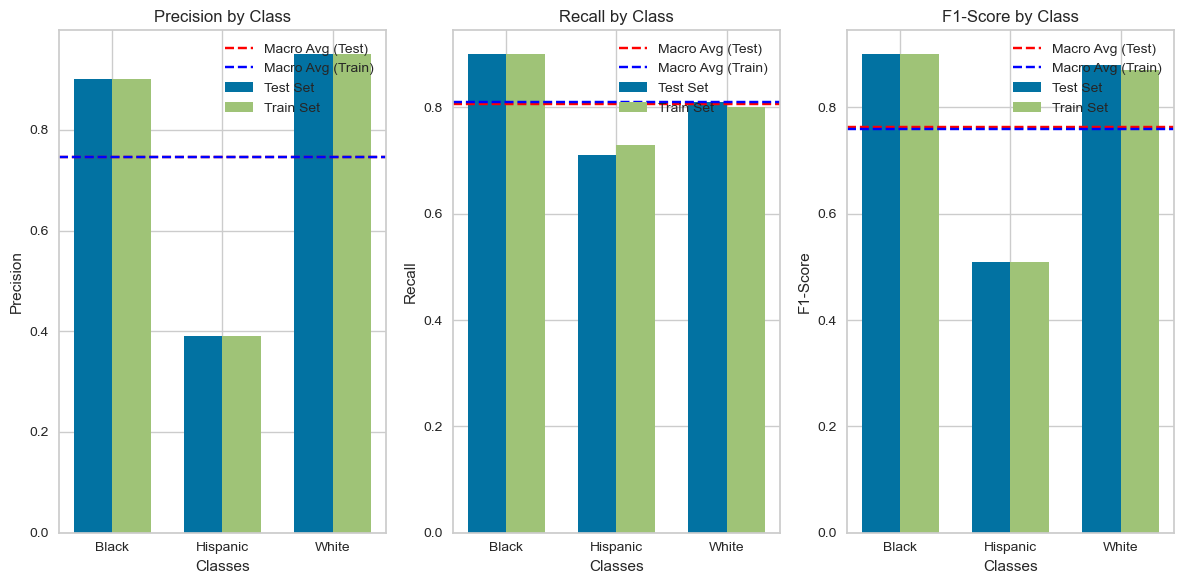

In [811]:

# Define the classes and metrics
classes = ["Black", "Hispanic", "White"]
precision_test = [0.90, 0.39, 0.95]
recall_test = [0.90, 0.71, 0.81]
f1_test = [0.90, 0.51, 0.88]

precision_train = [0.90, 0.39, 0.95]
recall_train = [0.90, 0.73, 0.80]
f1_train = [0.90, 0.51, 0.87]

# Macro and weighted averages
macro_precision_test = np.mean(precision_test)
macro_recall_test = np.mean(recall_test)
macro_f1_test = np.mean(f1_test)

macro_precision_train = np.mean(precision_train)
macro_recall_train = np.mean(recall_train)
macro_f1_train = np.mean(f1_train)

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(classes))

# Create subplots for each metric
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.bar(index - bar_width/2, precision_test, bar_width, label='Test Set')
plt.bar(index + bar_width/2, precision_train, bar_width, label='Train Set')
plt.axhline(y=macro_precision_test, color='red', linestyle='--', label='Macro Avg (Test)')
plt.axhline(y=macro_precision_train, color='blue', linestyle='--', label='Macro Avg (Train)')
plt.xlabel('Classes')
plt.ylabel('Precision')
plt.title('Precision by Class')
plt.xticks(index, classes)
plt.legend()

plt.subplot(132)
plt.bar(index - bar_width/2, recall_test, bar_width, label='Test Set')
plt.bar(index + bar_width/2, recall_train, bar_width, label='Train Set')
plt.axhline(y=macro_recall_test, color='red', linestyle='--', label='Macro Avg (Test)')
plt.axhline(y=macro_recall_train, color='blue', linestyle='--', label='Macro Avg (Train)')
plt.xlabel('Classes')
plt.ylabel('Recall')
plt.title('Recall by Class')
plt.xticks(index, classes)
plt.legend()

plt.subplot(133)
plt.bar(index - bar_width/2, f1_test, bar_width, label='Test Set')
plt.bar(index + bar_width/2, f1_train, bar_width, label='Train Set')
plt.axhline(y=macro_f1_test, color='red', linestyle='--', label='Macro Avg (Test)')
plt.axhline(y=macro_f1_train, color='blue', linestyle='--', label='Macro Avg (Train)')
plt.xlabel('Classes')
plt.ylabel('F1-Score')
plt.title('F1-Score by Class')
plt.xticks(index, classes)
plt.legend()

plt.tight_layout()
plt.show()



## 3. RF

### Vanilla RF Model

In [812]:
X01 = new_df01.drop("DODRace",axis=1)
y01 = new_df01.DODRace 

In [813]:
cat01 = X01.select_dtypes("object").columns
cat01

Index(['SubjectsBirthLocation'], dtype='object')

In [814]:
enc = OrdinalEncoder()
X2[cat] = enc.fit_transform(X2[cat])  
X2.head(3)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,0.0,2.0
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,0.0,3.0
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,0.0,3.0


In [815]:
X_train01, X_test01, y_train01, y_test01 = train_test_split(X01, y01, test_size=0.2, random_state=42, stratify =y01)

In [816]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [817]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=42))]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train01, y_train01)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['SubjectsBirthLocation'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [818]:
eval_metric(pipe_model_rf, X_train01, y_train01, X_test01, y_test01)

Test_Set
[[173   1  86]
 [  7   7 122]
 [  9   3 746]]
              precision    recall  f1-score   support

       Black       0.92      0.67      0.77       260
    Hispanic       0.64      0.05      0.10       136
       White       0.78      0.98      0.87       758

    accuracy                           0.80      1154
   macro avg       0.78      0.57      0.58      1154
weighted avg       0.79      0.80      0.76      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [819]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=42)),
]

model = Pipeline(steps=operations_rf)

scores = cross_validate(
    model, X_train01, y_train01, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.813333
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.040520
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.077044
train_f1_Hispanic           1.000000
dtype: float64

### RF Model GridsearchCV

In [820]:
param_grid = {'RF_model__n_estimators':[300,500],
             'RF_model__max_depth':[ 2, 4, 10, 16 ]}

In [821]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=42))]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(model,
                             param_grid,
                             verbose=2,
                             scoring=recall_Hispanic,
                             n_jobs=-1,
                             return_train_score=True)

In [822]:
rf_grid_model.fit(X_train01,y_train01)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['SubjectsBirthLocation'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 4, 10, 16],
                         'RF_model__n_estimators': [300, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=2)

In [823]:
rf_grid_model.best_index_

1

In [824]:
rf_grid_model.best_params_

{'RF_model__max_depth': 2, 'RF_model__n_estimators': 500}

In [825]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['SubjectsBirthLocation'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        n_estimators=500, random_state=42))])

In [826]:
rf_grid_model.best_score_

0.6279306829765545

In [827]:
eval_metric(rf_grid_model, X_train01, y_train01, X_test01, y_test01)

Test_Set
[[178  53  29]
 [  8  92  36]
 [ 66 305 387]]
              precision    recall  f1-score   support

       Black       0.71      0.68      0.70       260
    Hispanic       0.20      0.68      0.31       136
       White       0.86      0.51      0.64       758

    accuracy                           0.57      1154
   macro avg       0.59      0.62      0.55      1154
weighted avg       0.75      0.57      0.61      1154


Train_Set
[[ 722  215  101]
 [  46  370  127]
 [ 231 1255 1548]]
              precision    recall  f1-score   support

       Black       0.72      0.70      0.71      1038
    Hispanic       0.20      0.68      0.31       543
       White       0.87      0.51      0.64      3034

    accuracy                           0.57      4615
   macro avg       0.60      0.63      0.55      4615
weighted avg       0.76      0.57      0.62      4615



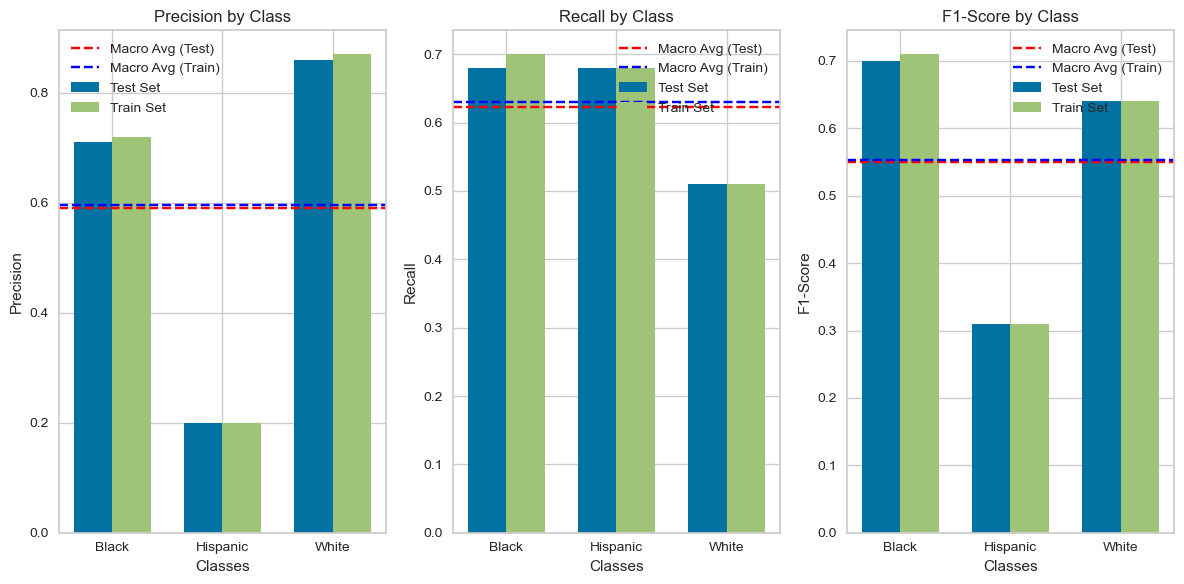

In [828]:

# Define the classes and metrics
classes = ["Black", "Hispanic", "White"]
precision_test = [0.71, 0.20, 0.86]
recall_test = [0.68, 0.68, 0.51]
f1_test = [0.70, 0.31, 0.64]

precision_train = [0.72, 0.20, 0.87]
recall_train = [0.70, 0.68, 0.51]
f1_train = [0.71, 0.31, 0.64]

# Macro and weighted averages
macro_precision_test = np.mean(precision_test)
macro_recall_test = np.mean(recall_test)
macro_f1_test = np.mean(f1_test)

macro_precision_train = np.mean(precision_train)
macro_recall_train = np.mean(recall_train)
macro_f1_train = np.mean(f1_train)

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(classes))

# Create subplots for each metric
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.bar(index - bar_width/2, precision_test, bar_width, label='Test Set')
plt.bar(index + bar_width/2, precision_train, bar_width, label='Train Set')
plt.axhline(y=macro_precision_test, color='red', linestyle='--', label='Macro Avg (Test)')
plt.axhline(y=macro_precision_train, color='blue', linestyle='--', label='Macro Avg (Train)')
plt.xlabel('Classes')
plt.ylabel('Precision')
plt.title('Precision by Class')
plt.xticks(index, classes)
plt.legend()

plt.subplot(132)
plt.bar(index - bar_width/2, recall_test, bar_width, label='Test Set')
plt.bar(index + bar_width/2, recall_train, bar_width, label='Train Set')
plt.axhline(y=macro_recall_test, color='red', linestyle='--', label='Macro Avg (Test)')
plt.axhline(y=macro_recall_train, color='blue', linestyle='--', label='Macro Avg (Train)')
plt.xlabel('Classes')
plt.ylabel('Recall')
plt.title('Recall by Class')
plt.xticks(index, classes)
plt.legend()

plt.subplot(133)
plt.bar(index - bar_width/2, f1_test, bar_width, label='Test Set')
plt.bar(index + bar_width/2, f1_train, bar_width, label='Train Set')
plt.axhline(y=macro_f1_test, color='red', linestyle='--', label='Macro Avg (Test)')
plt.axhline(y=macro_f1_train, color='blue', linestyle='--', label='Macro Avg (Train)')
plt.xlabel('Classes')
plt.ylabel('F1-Score')
plt.title('F1-Score by Class')
plt.xticks(index, classes)
plt.legend()

plt.tight_layout()
plt.show()


In [829]:
y_pred_RF_grid = rf_grid_model.predict(X_test01)
y_train_pred_RF_grid = rf_grid_model.predict(X_train01)

## 4. XGBoost

### Vanilla XGBoost Model

In [830]:
!pip install xgboost==0.90

In [831]:
import xgboost as xgb

xgb.__version__

'2.0.0'

In [832]:
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils import class_weight

In [833]:
xgboost_pipe =Pipeline([('Scaler',StandardScaler()),('XGB',XGBClassifier())]) 


In [834]:
xgboost_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'Scaler', 'XGB', 'Scaler__copy', 'Scaler__with_mean', 'Scaler__with_std', 'XGB__objective', 'XGB__base_score', 'XGB__booster', 'XGB__callbacks', 'XGB__colsample_bylevel', 'XGB__colsample_bynode', 'XGB__colsample_bytree', 'XGB__device', 'XGB__early_stopping_rounds', 'XGB__enable_categorical', 'XGB__eval_metric', 'XGB__feature_types', 'XGB__gamma', 'XGB__grow_policy', 'XGB__importance_type', 'XGB__interaction_constraints', 'XGB__learning_rate', 'XGB__max_bin', 'XGB__max_cat_threshold', 'XGB__max_cat_to_onehot', 'XGB__max_delta_step', 'XGB__max_depth', 'XGB__max_leaves', 'XGB__min_child_weight', 'XGB__missing', 'XGB__monotone_constraints', 'XGB__multi_strategy', 'XGB__n_estimators', 'XGB__n_jobs', 'XGB__num_parallel_tree', 'XGB__random_state', 'XGB__reg_alpha', 'XGB__reg_lambda', 'XGB__sampling_method', 'XGB__scale_pos_weight', 'XGB__subsample', 'XGB__tree_method', 'XGB__validate_parameters', 'XGB__verbosity'])

In [835]:
xgboost_pipe

Pipeline(steps=[('Scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [842]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train01)
classes_weights

array([0.50703142, 0.50703142, 0.50703142, ..., 0.50703142, 0.50703142,
       0.50703142])

In [846]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score
# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the class labels
y_train01_encoded = label_encoder.fit_transform(y_train01)

# Now, 'y_train_encoded' contains numerical labels


In [848]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=42)),
]

pipe_model_xgb = Pipeline(steps=operations_xgb)
# sorting will be same as classification_report.
y_train_xgb = y_train.map({"Black": 0, "Hispanic": 1, "White": 2})
y_test_xgb = y_test.map({"Black": 0, "Hispanic": 1, "White": 2})
# If the target is not numeric in xgb 1.6 and higher versions, it returns an error.
# That's why we do the conversion manually.


pipe_model_xgb.fit(X_train, y_train_xgb)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/marammahal/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/1g/n2mycrbs19x_yplp92cmn_1w0000gn/T/ipykernel_2511/220837720.py", line 14, in <module>
    pipe_model_xgb.fit(X_train, y_train_xgb)
  File "/Users/marammahal/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/marammahal/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/marammahal/anaconda3/lib/python3.11/site-packages/xgboost/core.py", line 729, in inner_f
    ----------
               
  File "/Users/marammahal/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py", line 1496, in fit
  File "/Users/marammahal/

In [ ]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train01,y_train01, sample_weight=classes_weights)

In [ ]:
new_df02 = new_df
new_df02.shape

In [ ]:
new_df02

In [ ]:
new_df02['DODRace'] = new_df02['DODRace'].replace({'Black':1, 'Hispanic':2, 'White':3})

In [ ]:
new_df02

In [ ]:
new_df02['DODRace'].value_counts()

In [ ]:
X01 = new_df01.drop("DODRace",axis=1)
y01 = new_df01.DODRace 

### XGBoost Model GridsearchCV

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## Logistic Regression Over/ Under Sampling

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef?
matthews_corrcoef(y_test, y_pred)

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score?
cohen_kappa_score(y_test, y_pred)

# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___